# **GUDANG GARAM (GGRM) Stock Forecasting Business Plan**

---

## **Introduction**

### **Company Background**  
Clove Investments Indonesia is a trusted mutual fund investment company dedicated to providing tailored financial solutions for a diverse range of investors. With a strong focus on growth, stability, and expert management, the company delivers personalized guidance through a skilled team of financial advisors to achieve clients' unique investment goals.

---

## **Stakeholders**

1. **Mutual Fund Manager:** Seeking innovative tools to enhance trading strategies for "GGRM" stock.
2. **Investors:** Expecting maximized returns with robust risk management and clear performance insights.

---

## **Problem Statement**

How can we develop a machine learning model capable of forecasting "GGRM" stock prices for the next year to:  
- Enhance the mutual fund manager's ability to execute long and short strategies.  
- Maximize returns through bi-directional trading.  
- Maintain robust risk management.

---

## **Goals**

- Minimize investment risk.  
- Enhance investor confidence.  
- Maximize returns by capitalizing on price movements.

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import warnings
warnings.filterwarnings("ignore")

# Forecasting
import prophet
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

import math
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import LSTM, Dense, Dropout, BatchNormalization

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

`LSTM Model`

In [80]:
df = pd.read_csv('cast.csv', parse_dates= True , index_col= "ds")
df.drop(columns = ['Unnamed: 0'], inplace = True)
df

,y
ds,
2021-02-05,32318.501953
2021-02-06,32318.501953
2021-02-07,32318.501953
2021-02-08,32256.154297
2021-02-09,32235.369141
...,...
2025-01-31,11250.000000
2025-02-01,11250.000000
2025-02-02,11250.000000


In [82]:
dataset = df["y"]
dataset = pd.DataFrame(dataset)

data = dataset.values

data.shape

(1461, 1)

In [164]:
df.describe()

,y
count,1461.000000
mean,23648.797527
std,5481.573748
min,10875.000000
25%,19750.000000
50%,24589.648438
75%,27864.843750
max,39281.007812


### **Descriptive Statistics:**  
- **Average Price:** Rp 23,648  
- **Min Price:** Rp 10,875  
- **Median:** Rp 24,589  
- **Max Price:** Rp 39,281  

---

## **Data Preparation and Analysis**  

- **Training Data:** February 5, 2021 – December 31, 2023  
- **Validation Data:** January 1, 2024 – February 4, 2025

---

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data).reshape(-1, 1))

In [86]:
train_size = int(len(data)*.75)
test_size = len(data) - train_size

print("Train Size :",train_size,"Test Size :",test_size)

train_data = scaled_data[ :train_size , 0:1 ]
test_data = scaled_data[ train_size-60: , 0:1 ]

Train Size : 1095 Test Size : 366


In [88]:
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [90]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [92]:
# Reshaping the input
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [94]:
model = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], 1)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_error'])

In [96]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          29,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,465 (165.88 KB)

 Trainable params: 42,465 (165.88 KB)

 Non-trainable params: 0 (0.00 B)

In [100]:
# Fitting the LSTM to the Training set
callbacks = [EarlyStopping(monitor= 'loss', patience= 10 , restore_best_weights= True)]
history = model.fit(x_train, y_train, epochs= 100, batch_size= 32 , callbacks= callbacks )

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0013 - mean_absolute_error: 0.0258    
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0011 - mean_absolute_error: 0.0216    
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0011 - mean_absolute_error: 0.0232
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0011 - mean_absolute_error: 0.0231    
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0011 - mean_absolute_error: 0.0225    
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 9.7829e-04 - mean_absolute_error: 0.0215
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0012 - mean_absolute_error: 0.0250    
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 9.5841e-04 - mean_absolute_error: 0.0213
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0010 - mean_absolute_error: 0.0223    
Epoch 10/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0010 - mean_absolute_error: 0.02

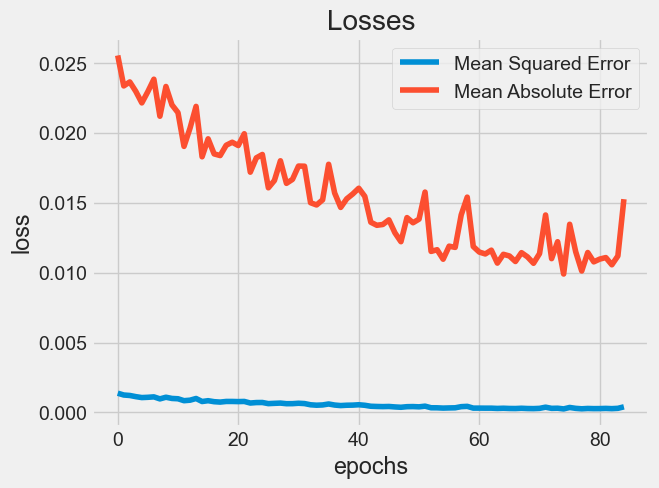

In [101]:
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [102]:
x_test = []
y_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [103]:
#inverse y_test scaling
predictions = model.predict(x_test)

#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step 


(366, 1)

In [104]:
y_test = scaler.inverse_transform([y_test])

RMSE = np.sqrt(np.mean(y_test - predictions )**2).round(2)
RMSE

87.59

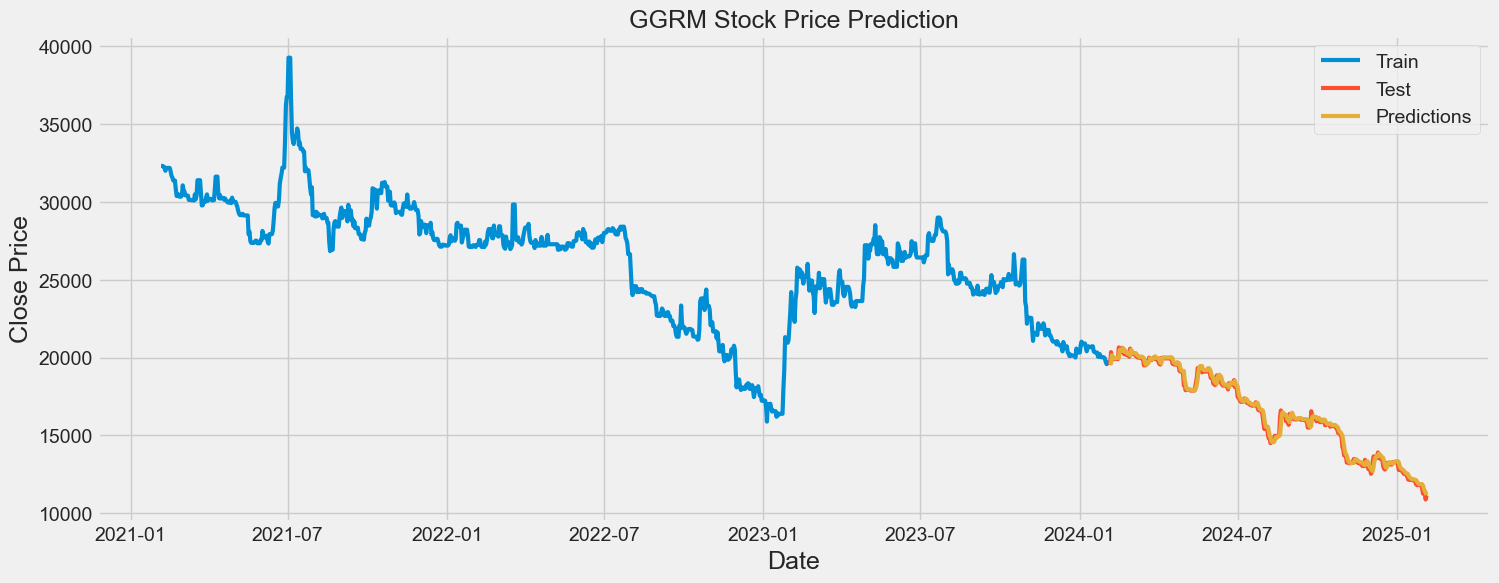

In [106]:
train = dataset.iloc[:train_size , 0:1]
test = dataset.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('GGRM Stock Price Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Price', fontsize= 18)
plt.plot(train['y'], linewidth= 3)
plt.plot(test['y'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])

In [134]:
from datetime import timedelta

In [136]:
def insert_end(Xin, new_input):
    timestep = 60
    for i in range(timestep - 1):
        Xin[:, i, :] = Xin[:, i+1, :]
    Xin[:, timestep - 1, :] = new_input
    return Xin

In [138]:
future = 30
forcast = []
Xin = x_test[-1 :, :, :]
time = []
for i in range(0, future):
    out = model.predict(Xin, batch_size=5)
    forcast.append(out[0, 0]) 
    print(forcast)
    Xin = insert_end(Xin, out[0, 0]) 
    time.append(pd.to_datetime(df.index[-1]) + timedelta(days=i))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[0.776992]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[0.776992, 0.7780866]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[0.776992, 0.7780866, 0.7791641]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[0.776992, 0.7780866, 0.7791641, 0.78022486]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[0.776992, 0.7780866, 0.7791641, 0.78022486, 0.78126913]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[0.776992, 0.7780866, 0.7791641, 0.78022486, 0.78126913, 0.78229696]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[0.776992, 0.7780866, 0.7791641, 0.78022486, 0.78126913, 0.78229696, 0.7833086]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[0.776992, 0.7780866, 0.7791641, 0.78022486, 0.78126913, 0.78229696, 0.7833086, 0.7843044]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[0.776992, 0.7780866, 0.7791641, 0.78022486, 0.78126913, 0.78229696, 0.7833086, 0.7843044, 0.7852842]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[0.776992, 0.7780866, 0.7791641, 0.78022486, 0.78126913, 0.78229696, 0.7833086, 0.7843044, 0.7852842, 0.786248

In [139]:
forcasted_output = np.asanyarray(forcast)   
forcasted_output = forcasted_output.reshape(-1, 1) 
forcasted_output = scaler.inverse_transform(forcasted_output) 

In [140]:
forcasted_output = pd.DataFrame(forcasted_output)
date = pd.DataFrame(time)
df_result = pd.concat([date,forcasted_output], axis=1)
df_result.columns = "Date", "Forecasted"

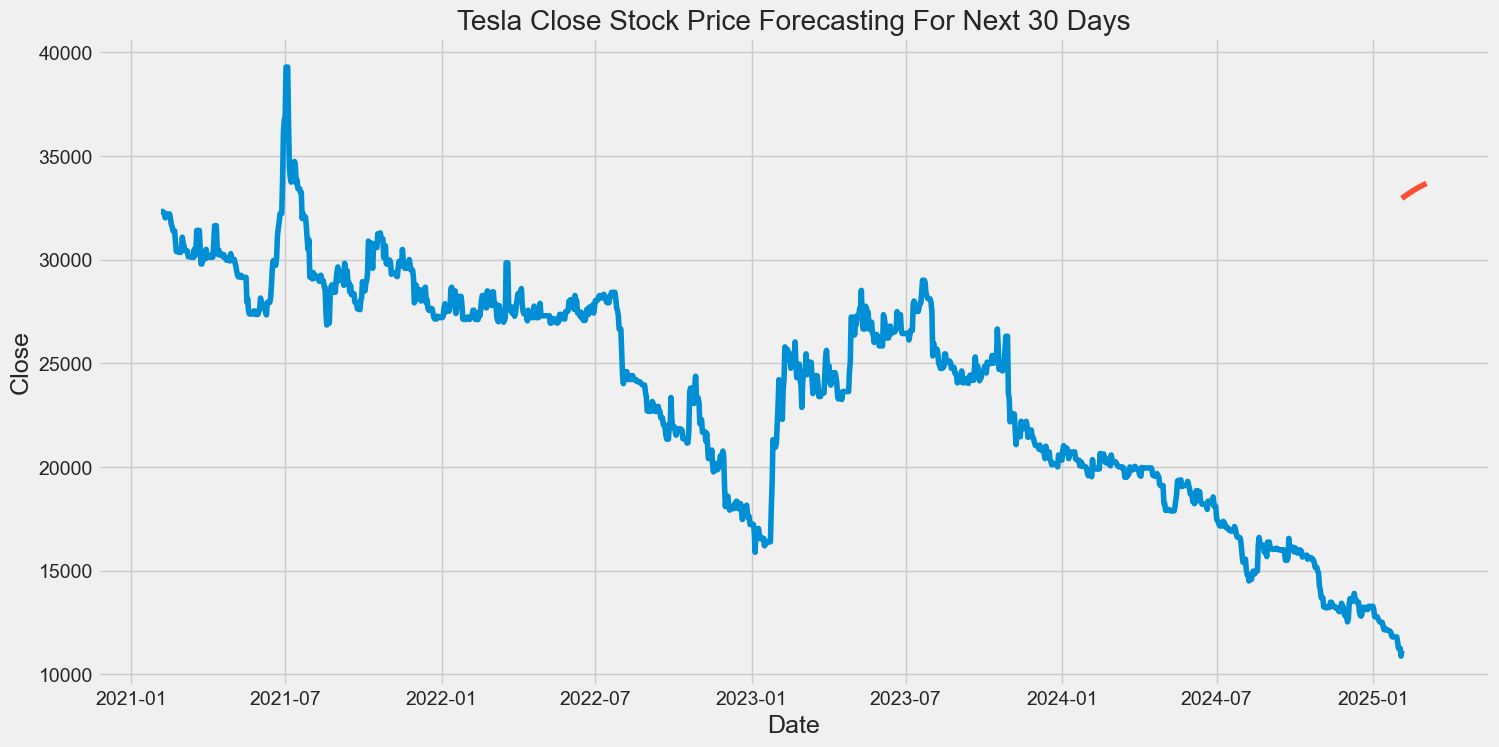

In [144]:
plt.figure(figsize=(16, 8))
plt.title('Tesla Close Stock Price Forecasting For Next 30 Days')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close' ,fontsize=18)
plt.plot(df['y'])
plt.plot(df_result.set_index('Date')[['Forecasted']])

In [32]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
from itertools import product
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('cast.csv').drop(columns=['Unnamed: 0'])
df['ds'] = pd.to_datetime(df['ds'], format='%Y-%m-%d')

# Generate synthetic regressors
np.random.seed(42)
df['holiday_index'] = np.random.uniform(0, 1, len(df))
df['macro_factor'] = np.random.uniform(0, 1, len(df))

# Train-test split
df_train = df[(df['ds'] >= '2021-02-05') & (df['ds'] <= '2023-12-31')]
df_test = df[(df['ds'] >= '2024-01-01') & (df['ds'] <= '2025-02-04')]

# Enhanced parameter grid
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'n_changepoints': [25, 30, 35],
    'changepoint_range': [0.85, 0.9],
    'yearly_fourier_order': [8, 12]  # New parameter for custom seasonality    
}

# Performance metric calculation
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

best_mae = float("inf")
best_params = None
best_model = None

# Grid search implementation
for params in product(*param_grid.values()):
    try:
        # Unpack parameters
        (cps, sps, smode, ncp, crange, yfourier) = params
        
        # Initialize model with current parameters
        model = Prophet(
            changepoint_prior_scale=cps,
            seasonality_prior_scale=sps,
            seasonality_mode=smode,
            n_changepoints=ncp,
            changepoint_range=crange,
            yearly_seasonality=False  # Disable default yearly seasonality
        )
        
        # Add custom seasonality with specified Fourier order
        model.add_seasonality(
            name='yearly',
            period=365.25,
            fourier_order=yfourier
        )
        
        # Add regressors
        model.add_regressor('holiday_index')
        model.add_regressor('macro_factor')
        
        # Fit model
        model.fit(df_train)
        
        # Create future dataframe
        future = model.make_future_dataframe(periods=len(df_test), include_history=False)
        future['holiday_index'] = df_test['holiday_index'].values
        future['macro_factor'] = df_test['macro_factor'].values
        
        # Generate predictions
        forecast = model.predict(future)
        results = pd.merge(df_test, forecast[['ds', 'yhat']], on='ds')
        
        # Calculate metrics
        mae = mean_absolute_error(results['y'], results['yhat'])
        mape = mean_absolute_percentage_error(results['y'], results['yhat'])
        
        print(f"Params: {params} | MAE: {mae:.2f}, MAPE: {mape:.2f}%")
        
        if mae < best_mae:
            best_mae = mae
            best_mape = mape
            best_params = params
            best_model = model
            
    except Exception as e:
        print(f"Error with params {params}: {str(e)}")
        continue

print(f"\nBest Params: {best_params}")
print(f"Best MAE: {best_mae:.2f}, MAPE: {best_mape:.2f}%")

# Final model training and forecasting
full_model = Prophet(
    changepoint_prior_scale=best_params[0],
    seasonality_prior_scale=best_params[1],
    seasonality_mode=best_params[2],
    n_changepoints=best_params[3],
    changepoint_range=best_params[4],
    yearly_seasonality=False
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=best_params[5]
).add_regressor('holiday_index').add_regressor('macro_factor')

full_model.fit(df)

# Create 1-year future dataframe
future = full_model.make_future_dataframe(periods=365, freq='D')
future['holiday_index'] = np.random.uniform(0, 1, len(future))  # Replace with actual data
future['macro_factor'] = np.random.uniform(0, 1, len(future))   # Replace with actual data

# Generate forecast
forecast = full_model.predict(future)

02:30:18 - cmdstanpy - INFO - Chain [1] start processing
02:30:18 - cmdstanpy - INFO - Chain [1] done processing
02:30:18 - cmdstanpy - INFO - Chain [1] start processing
02:30:18 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.01, 'additive', 25, 0.85, 8) | MAE: 3702.06, MAPE: 23.60%


02:30:19 - cmdstanpy - INFO - Chain [1] start processing
02:30:19 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.01, 'additive', 25, 0.85, 12) | MAE: 3596.96, MAPE: 22.93%
Params: (0.001, 0.01, 'additive', 25, 0.9, 8) | MAE: 3857.75, MAPE: 24.64%


02:30:19 - cmdstanpy - INFO - Chain [1] start processing
02:30:19 - cmdstanpy - INFO - Chain [1] done processing
02:30:19 - cmdstanpy - INFO - Chain [1] start processing
02:30:19 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.01, 'additive', 25, 0.9, 12) | MAE: 3719.18, MAPE: 23.71%
Params: (0.001, 0.01, 'additive', 30, 0.85, 8) | MAE: 3648.46, MAPE: 23.25%


02:30:19 - cmdstanpy - INFO - Chain [1] start processing
02:30:19 - cmdstanpy - INFO - Chain [1] done processing
02:30:19 - cmdstanpy - INFO - Chain [1] start processing
02:30:19 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.01, 'additive', 30, 0.85, 12) | MAE: 3635.57, MAPE: 23.17%
Params: (0.001, 0.01, 'additive', 30, 0.9, 8) | MAE: 3692.80, MAPE: 23.60%


02:30:20 - cmdstanpy - INFO - Chain [1] start processing
02:30:20 - cmdstanpy - INFO - Chain [1] done processing
02:30:20 - cmdstanpy - INFO - Chain [1] start processing
02:30:20 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.01, 'additive', 30, 0.9, 12) | MAE: 3611.31, MAPE: 23.02%
Params: (0.001, 0.01, 'additive', 35, 0.85, 8) | MAE: 3833.55, MAPE: 24.47%


02:30:20 - cmdstanpy - INFO - Chain [1] start processing
02:30:20 - cmdstanpy - INFO - Chain [1] done processing
02:30:20 - cmdstanpy - INFO - Chain [1] start processing
02:30:20 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.01, 'additive', 35, 0.85, 12) | MAE: 3905.86, MAPE: 24.91%


02:30:21 - cmdstanpy - INFO - Chain [1] start processing
02:30:21 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.01, 'additive', 35, 0.9, 8) | MAE: 3904.80, MAPE: 24.92%


02:30:21 - cmdstanpy - INFO - Chain [1] start processing
02:30:21 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.01, 'additive', 35, 0.9, 12) | MAE: 3681.16, MAPE: 23.49%


02:30:21 - cmdstanpy - INFO - Chain [1] start processing
02:30:21 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.01, 'multiplicative', 25, 0.85, 8) | MAE: 3678.12, MAPE: 23.89%


02:30:21 - cmdstanpy - INFO - Chain [1] start processing
02:30:21 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.01, 'multiplicative', 25, 0.85, 12) | MAE: 3770.87, MAPE: 24.45%


02:30:21 - cmdstanpy - INFO - Chain [1] start processing
02:30:21 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.01, 'multiplicative', 25, 0.9, 8) | MAE: 3744.05, MAPE: 24.29%


02:30:22 - cmdstanpy - INFO - Chain [1] start processing
02:30:22 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.01, 'multiplicative', 25, 0.9, 12) | MAE: 3695.07, MAPE: 23.99%


02:30:22 - cmdstanpy - INFO - Chain [1] start processing
02:30:22 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.01, 'multiplicative', 30, 0.85, 8) | MAE: 3554.06, MAPE: 23.13%


02:30:22 - cmdstanpy - INFO - Chain [1] start processing
02:30:22 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.01, 'multiplicative', 30, 0.85, 12) | MAE: 3497.07, MAPE: 22.74%


02:30:22 - cmdstanpy - INFO - Chain [1] start processing
02:30:22 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.01, 'multiplicative', 30, 0.9, 8) | MAE: 3920.98, MAPE: 25.42%


02:30:22 - cmdstanpy - INFO - Chain [1] start processing
02:30:23 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.01, 'multiplicative', 30, 0.9, 12) | MAE: 3579.87, MAPE: 23.30%
Params: (0.001, 0.01, 'multiplicative', 35, 0.85, 8) | MAE: 3702.86, MAPE: 24.09%


02:30:23 - cmdstanpy - INFO - Chain [1] start processing
02:30:23 - cmdstanpy - INFO - Chain [1] done processing
02:30:23 - cmdstanpy - INFO - Chain [1] start processing
02:30:23 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.01, 'multiplicative', 35, 0.85, 12) | MAE: 3703.24, MAPE: 24.04%


02:30:23 - cmdstanpy - INFO - Chain [1] start processing
02:30:23 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.01, 'multiplicative', 35, 0.9, 8) | MAE: 3597.39, MAPE: 23.39%


02:30:23 - cmdstanpy - INFO - Chain [1] start processing
02:30:23 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.01, 'multiplicative', 35, 0.9, 12) | MAE: 3670.68, MAPE: 23.88%
Params: (0.001, 0.1, 'additive', 25, 0.85, 8) | MAE: 3819.48, MAPE: 24.32%


02:30:24 - cmdstanpy - INFO - Chain [1] start processing
02:30:24 - cmdstanpy - INFO - Chain [1] done processing
02:30:24 - cmdstanpy - INFO - Chain [1] start processing
02:30:24 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.1, 'additive', 25, 0.85, 12) | MAE: 3675.00, MAPE: 23.33%


02:30:24 - cmdstanpy - INFO - Chain [1] start processing
02:30:24 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.1, 'additive', 25, 0.9, 8) | MAE: 3932.83, MAPE: 24.98%


02:30:24 - cmdstanpy - INFO - Chain [1] start processing
02:30:24 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.1, 'additive', 25, 0.9, 12) | MAE: 3798.54, MAPE: 24.11%
Params: (0.001, 0.1, 'additive', 30, 0.85, 8) | MAE: 3507.55, MAPE: 22.26%


02:30:24 - cmdstanpy - INFO - Chain [1] start processing
02:30:24 - cmdstanpy - INFO - Chain [1] done processing
02:30:25 - cmdstanpy - INFO - Chain [1] start processing
02:30:25 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.1, 'additive', 30, 0.85, 12) | MAE: 3936.61, MAPE: 25.02%


02:30:25 - cmdstanpy - INFO - Chain [1] start processing
02:30:25 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.1, 'additive', 30, 0.9, 8) | MAE: 3776.67, MAPE: 23.99%


02:30:25 - cmdstanpy - INFO - Chain [1] start processing
02:30:25 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.1, 'additive', 30, 0.9, 12) | MAE: 3907.87, MAPE: 24.88%
Params: (0.001, 0.1, 'additive', 35, 0.85, 8) | MAE: 3836.70, MAPE: 24.41%


02:30:25 - cmdstanpy - INFO - Chain [1] start processing
02:30:25 - cmdstanpy - INFO - Chain [1] done processing
02:30:25 - cmdstanpy - INFO - Chain [1] start processing
02:30:26 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.1, 'additive', 35, 0.85, 12) | MAE: 3524.33, MAPE: 22.37%


02:30:26 - cmdstanpy - INFO - Chain [1] start processing
02:30:26 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.1, 'additive', 35, 0.9, 8) | MAE: 3620.43, MAPE: 23.02%
Params: (0.001, 0.1, 'additive', 35, 0.9, 12) | MAE: 3686.95, MAPE: 23.46%


02:30:26 - cmdstanpy - INFO - Chain [1] start processing
02:30:26 - cmdstanpy - INFO - Chain [1] done processing
02:30:26 - cmdstanpy - INFO - Chain [1] start processing
02:30:26 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.1, 'multiplicative', 25, 0.85, 8) | MAE: 3571.74, MAPE: 23.17%


02:30:26 - cmdstanpy - INFO - Chain [1] start processing
02:30:26 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.1, 'multiplicative', 25, 0.85, 12) | MAE: 3595.69, MAPE: 23.23%
Params: (0.001, 0.1, 'multiplicative', 25, 0.9, 8) | MAE: 3685.92, MAPE: 23.79%


02:30:27 - cmdstanpy - INFO - Chain [1] start processing
02:30:27 - cmdstanpy - INFO - Chain [1] done processing
02:30:27 - cmdstanpy - INFO - Chain [1] start processing
02:30:27 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.1, 'multiplicative', 25, 0.9, 12) | MAE: 3775.91, MAPE: 24.33%
Params: (0.001, 0.1, 'multiplicative', 30, 0.85, 8) | MAE: 3531.90, MAPE: 22.86%


02:30:27 - cmdstanpy - INFO - Chain [1] start processing
02:30:27 - cmdstanpy - INFO - Chain [1] done processing
02:30:27 - cmdstanpy - INFO - Chain [1] start processing
02:30:27 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.1, 'multiplicative', 30, 0.85, 12) | MAE: 3728.75, MAPE: 24.05%


02:30:27 - cmdstanpy - INFO - Chain [1] start processing
02:30:28 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.1, 'multiplicative', 30, 0.9, 8) | MAE: 3748.93, MAPE: 24.19%


02:30:28 - cmdstanpy - INFO - Chain [1] start processing
02:30:28 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.1, 'multiplicative', 30, 0.9, 12) | MAE: 3645.12, MAPE: 23.58%


02:30:28 - cmdstanpy - INFO - Chain [1] start processing
02:30:28 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.1, 'multiplicative', 35, 0.85, 8) | MAE: 3803.35, MAPE: 24.46%


02:30:28 - cmdstanpy - INFO - Chain [1] start processing
02:30:28 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.1, 'multiplicative', 35, 0.85, 12) | MAE: 3674.00, MAPE: 23.62%
Params: (0.001, 0.1, 'multiplicative', 35, 0.9, 8) | MAE: 3594.68, MAPE: 23.17%


02:30:28 - cmdstanpy - INFO - Chain [1] start processing
02:30:28 - cmdstanpy - INFO - Chain [1] done processing
02:30:29 - cmdstanpy - INFO - Chain [1] start processing
02:30:29 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 0.1, 'multiplicative', 35, 0.9, 12) | MAE: 3854.19, MAPE: 24.72%
Params: (0.001, 1.0, 'additive', 25, 0.85, 8) | MAE: 3827.98, MAPE: 24.36%


02:30:29 - cmdstanpy - INFO - Chain [1] start processing
02:30:29 - cmdstanpy - INFO - Chain [1] done processing
02:30:29 - cmdstanpy - INFO - Chain [1] start processing
02:30:29 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 1.0, 'additive', 25, 0.85, 12) | MAE: 3783.20, MAPE: 24.05%
Params: (0.001, 1.0, 'additive', 25, 0.9, 8) | MAE: 3875.66, MAPE: 24.61%


02:30:29 - cmdstanpy - INFO - Chain [1] start processing
02:30:29 - cmdstanpy - INFO - Chain [1] done processing
02:30:29 - cmdstanpy - INFO - Chain [1] start processing
02:30:29 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 1.0, 'additive', 25, 0.9, 12) | MAE: 3792.63, MAPE: 24.12%
Params: (0.001, 1.0, 'additive', 30, 0.85, 8) | MAE: 3790.83, MAPE: 24.15%


02:30:30 - cmdstanpy - INFO - Chain [1] start processing
02:30:30 - cmdstanpy - INFO - Chain [1] done processing
02:30:30 - cmdstanpy - INFO - Chain [1] start processing
02:30:30 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 1.0, 'additive', 30, 0.85, 12) | MAE: 3880.15, MAPE: 24.70%


02:30:30 - cmdstanpy - INFO - Chain [1] start processing
02:30:30 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 1.0, 'additive', 30, 0.9, 8) | MAE: 3825.15, MAPE: 24.33%


02:30:30 - cmdstanpy - INFO - Chain [1] start processing
02:30:30 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 1.0, 'additive', 30, 0.9, 12) | MAE: 3841.86, MAPE: 24.42%
Params: (0.001, 1.0, 'additive', 35, 0.85, 8) | MAE: 3751.73, MAPE: 23.83%


02:30:30 - cmdstanpy - INFO - Chain [1] start processing
02:30:30 - cmdstanpy - INFO - Chain [1] done processing
02:30:31 - cmdstanpy - INFO - Chain [1] start processing
02:30:31 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 1.0, 'additive', 35, 0.85, 12) | MAE: 3677.42, MAPE: 23.33%


02:30:31 - cmdstanpy - INFO - Chain [1] start processing
02:30:31 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 1.0, 'additive', 35, 0.9, 8) | MAE: 3741.70, MAPE: 23.76%


02:30:31 - cmdstanpy - INFO - Chain [1] start processing
02:30:31 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 1.0, 'additive', 35, 0.9, 12) | MAE: 3706.19, MAPE: 23.53%
Params: (0.001, 1.0, 'multiplicative', 25, 0.85, 8) | MAE: 3586.95, MAPE: 23.18%


02:30:31 - cmdstanpy - INFO - Chain [1] start processing
02:30:31 - cmdstanpy - INFO - Chain [1] done processing
02:30:31 - cmdstanpy - INFO - Chain [1] start processing
02:30:32 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 1.0, 'multiplicative', 25, 0.85, 12) | MAE: 3574.56, MAPE: 23.10%


02:30:32 - cmdstanpy - INFO - Chain [1] start processing
02:30:32 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 1.0, 'multiplicative', 25, 0.9, 8) | MAE: 3758.82, MAPE: 24.21%
Params: (0.001, 1.0, 'multiplicative', 25, 0.9, 12) | MAE: 3990.53, MAPE: 25.70%


02:30:32 - cmdstanpy - INFO - Chain [1] start processing
02:30:32 - cmdstanpy - INFO - Chain [1] done processing
02:30:32 - cmdstanpy - INFO - Chain [1] start processing
02:30:32 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 1.0, 'multiplicative', 30, 0.85, 8) | MAE: 3628.07, MAPE: 23.43%


02:30:32 - cmdstanpy - INFO - Chain [1] start processing
02:30:32 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 1.0, 'multiplicative', 30, 0.85, 12) | MAE: 3761.81, MAPE: 24.24%


02:30:33 - cmdstanpy - INFO - Chain [1] start processing
02:30:33 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 1.0, 'multiplicative', 30, 0.9, 8) | MAE: 3852.36, MAPE: 24.81%
Params: (0.001, 1.0, 'multiplicative', 30, 0.9, 12) | MAE: 3836.19, MAPE: 24.77%


02:30:33 - cmdstanpy - INFO - Chain [1] start processing
02:30:33 - cmdstanpy - INFO - Chain [1] done processing
02:30:33 - cmdstanpy - INFO - Chain [1] start processing
02:30:33 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 1.0, 'multiplicative', 35, 0.85, 8) | MAE: 3725.70, MAPE: 24.00%
Params: (0.001, 1.0, 'multiplicative', 35, 0.85, 12) | MAE: 3805.58, MAPE: 24.45%


02:30:33 - cmdstanpy - INFO - Chain [1] start processing
02:30:33 - cmdstanpy - INFO - Chain [1] done processing
02:30:33 - cmdstanpy - INFO - Chain [1] start processing
02:30:33 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 1.0, 'multiplicative', 35, 0.9, 8) | MAE: 3787.42, MAPE: 24.38%


02:30:34 - cmdstanpy - INFO - Chain [1] start processing
02:30:34 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 1.0, 'multiplicative', 35, 0.9, 12) | MAE: 3697.60, MAPE: 23.83%


02:30:34 - cmdstanpy - INFO - Chain [1] start processing
02:30:34 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 10.0, 'additive', 25, 0.85, 8) | MAE: 3871.69, MAPE: 24.64%


02:30:34 - cmdstanpy - INFO - Chain [1] start processing
02:30:34 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 10.0, 'additive', 25, 0.85, 12) | MAE: 3741.69, MAPE: 23.75%
Params: (0.001, 10.0, 'additive', 25, 0.9, 8) | MAE: 3653.87, MAPE: 23.24%


02:30:34 - cmdstanpy - INFO - Chain [1] start processing
02:30:34 - cmdstanpy - INFO - Chain [1] done processing
02:30:34 - cmdstanpy - INFO - Chain [1] start processing
02:30:35 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 10.0, 'additive', 25, 0.9, 12) | MAE: 3848.10, MAPE: 24.46%


02:30:35 - cmdstanpy - INFO - Chain [1] start processing
02:30:35 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 10.0, 'additive', 30, 0.85, 8) | MAE: 4019.81, MAPE: 25.59%


02:30:35 - cmdstanpy - INFO - Chain [1] start processing
02:30:35 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 10.0, 'additive', 30, 0.85, 12) | MAE: 3852.34, MAPE: 24.52%


02:30:35 - cmdstanpy - INFO - Chain [1] start processing
02:30:35 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 10.0, 'additive', 30, 0.9, 8) | MAE: 3851.51, MAPE: 24.52%


02:30:35 - cmdstanpy - INFO - Chain [1] start processing
02:30:35 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 10.0, 'additive', 30, 0.9, 12) | MAE: 3909.06, MAPE: 24.84%


02:30:36 - cmdstanpy - INFO - Chain [1] start processing
02:30:36 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 10.0, 'additive', 35, 0.85, 8) | MAE: 3648.33, MAPE: 23.18%


02:30:36 - cmdstanpy - INFO - Chain [1] start processing
02:30:36 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 10.0, 'additive', 35, 0.85, 12) | MAE: 3540.25, MAPE: 22.46%


02:30:36 - cmdstanpy - INFO - Chain [1] start processing
02:30:36 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 10.0, 'additive', 35, 0.9, 8) | MAE: 3617.59, MAPE: 22.98%


02:30:36 - cmdstanpy - INFO - Chain [1] start processing
02:30:36 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 10.0, 'additive', 35, 0.9, 12) | MAE: 3588.74, MAPE: 22.79%
Params: (0.001, 10.0, 'multiplicative', 25, 0.85, 8) | MAE: 3559.91, MAPE: 23.01%


02:30:37 - cmdstanpy - INFO - Chain [1] start processing
02:30:37 - cmdstanpy - INFO - Chain [1] done processing
02:30:37 - cmdstanpy - INFO - Chain [1] start processing
02:30:37 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 10.0, 'multiplicative', 25, 0.85, 12) | MAE: 3479.16, MAPE: 22.49%
Params: (0.001, 10.0, 'multiplicative', 25, 0.9, 8) | MAE: 3908.83, MAPE: 25.16%


02:30:37 - cmdstanpy - INFO - Chain [1] start processing
02:30:37 - cmdstanpy - INFO - Chain [1] done processing
02:30:37 - cmdstanpy - INFO - Chain [1] start processing
02:30:37 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 10.0, 'multiplicative', 25, 0.9, 12) | MAE: 3807.05, MAPE: 24.54%
Params: (0.001, 10.0, 'multiplicative', 30, 0.85, 8) | MAE: 3646.54, MAPE: 23.55%


02:30:37 - cmdstanpy - INFO - Chain [1] start processing
02:30:37 - cmdstanpy - INFO - Chain [1] done processing
02:30:38 - cmdstanpy - INFO - Chain [1] start processing
02:30:38 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 10.0, 'multiplicative', 30, 0.85, 12) | MAE: 3773.02, MAPE: 24.31%


02:30:38 - cmdstanpy - INFO - Chain [1] start processing
02:30:38 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 10.0, 'multiplicative', 30, 0.9, 8) | MAE: 3809.15, MAPE: 24.59%


02:30:38 - cmdstanpy - INFO - Chain [1] start processing
02:30:38 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 10.0, 'multiplicative', 30, 0.9, 12) | MAE: 3791.69, MAPE: 24.49%
Params: (0.001, 10.0, 'multiplicative', 35, 0.85, 8) | MAE: 3550.23, MAPE: 22.92%


02:30:38 - cmdstanpy - INFO - Chain [1] start processing
02:30:38 - cmdstanpy - INFO - Chain [1] done processing
02:30:38 - cmdstanpy - INFO - Chain [1] start processing
02:30:39 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 10.0, 'multiplicative', 35, 0.85, 12) | MAE: 3592.49, MAPE: 23.15%
Params: (0.001, 10.0, 'multiplicative', 35, 0.9, 8) | MAE: 3797.48, MAPE: 24.46%


02:30:39 - cmdstanpy - INFO - Chain [1] start processing
02:30:39 - cmdstanpy - INFO - Chain [1] done processing
02:30:39 - cmdstanpy - INFO - Chain [1] start processing
02:30:39 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.001, 10.0, 'multiplicative', 35, 0.9, 12) | MAE: 3736.78, MAPE: 24.08%


02:30:39 - cmdstanpy - INFO - Chain [1] start processing
02:30:39 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.01, 'additive', 25, 0.85, 8) | MAE: 7172.98, MAPE: 45.85%


02:30:39 - cmdstanpy - INFO - Chain [1] start processing
02:30:39 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.01, 'additive', 25, 0.85, 12) | MAE: 7110.04, MAPE: 45.43%


02:30:40 - cmdstanpy - INFO - Chain [1] start processing
02:30:40 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.01, 'additive', 25, 0.9, 8) | MAE: 7342.29, MAPE: 46.95%


02:30:40 - cmdstanpy - INFO - Chain [1] start processing
02:30:40 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.01, 'additive', 25, 0.9, 12) | MAE: 6959.17, MAPE: 44.47%


02:30:40 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.01, 0.01, 'additive', 30, 0.85, 8) | MAE: 7228.18, MAPE: 46.21%


02:30:40 - cmdstanpy - INFO - Chain [1] done processing
02:30:40 - cmdstanpy - INFO - Chain [1] start processing
02:30:41 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.01, 'additive', 30, 0.85, 12) | MAE: 7017.68, MAPE: 44.84%


02:30:41 - cmdstanpy - INFO - Chain [1] start processing
02:30:41 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.01, 'additive', 30, 0.9, 8) | MAE: 7143.93, MAPE: 45.65%


02:30:41 - cmdstanpy - INFO - Chain [1] start processing
02:30:41 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.01, 'additive', 30, 0.9, 12) | MAE: 6867.24, MAPE: 43.85%


02:30:41 - cmdstanpy - INFO - Chain [1] start processing
02:30:41 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.01, 'additive', 35, 0.85, 8) | MAE: 7260.35, MAPE: 46.44%


02:30:41 - cmdstanpy - INFO - Chain [1] start processing
02:30:42 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.01, 'additive', 35, 0.85, 12) | MAE: 7140.63, MAPE: 45.65%


02:30:42 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.01, 0.01, 'additive', 35, 0.9, 8) | MAE: 6983.52, MAPE: 44.61%


02:30:42 - cmdstanpy - INFO - Chain [1] done processing
02:30:42 - cmdstanpy - INFO - Chain [1] start processing
02:30:42 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.01, 'additive', 35, 0.9, 12) | MAE: 6834.80, MAPE: 43.64%


02:30:42 - cmdstanpy - INFO - Chain [1] start processing
02:30:42 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.01, 'multiplicative', 25, 0.85, 8) | MAE: 6365.44, MAPE: 40.84%


02:30:42 - cmdstanpy - INFO - Chain [1] start processing
02:30:42 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.01, 'multiplicative', 25, 0.85, 12) | MAE: 6029.04, MAPE: 38.66%


02:30:43 - cmdstanpy - INFO - Chain [1] start processing
02:30:43 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.01, 'multiplicative', 25, 0.9, 8) | MAE: 6067.46, MAPE: 38.89%


02:30:43 - cmdstanpy - INFO - Chain [1] start processing
02:30:43 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.01, 'multiplicative', 25, 0.9, 12) | MAE: 6246.29, MAPE: 40.04%


02:30:43 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.01, 0.01, 'multiplicative', 30, 0.85, 8) | MAE: 5670.50, MAPE: 36.34%


02:30:43 - cmdstanpy - INFO - Chain [1] done processing
02:30:43 - cmdstanpy - INFO - Chain [1] start processing
02:30:43 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.01, 'multiplicative', 30, 0.85, 12) | MAE: 5567.85, MAPE: 35.68%


02:30:44 - cmdstanpy - INFO - Chain [1] start processing
02:30:44 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.01, 'multiplicative', 30, 0.9, 8) | MAE: 5714.03, MAPE: 36.61%


02:30:44 - cmdstanpy - INFO - Chain [1] start processing
02:30:44 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.01, 'multiplicative', 30, 0.9, 12) | MAE: 5871.79, MAPE: 37.62%


02:30:44 - cmdstanpy - INFO - Chain [1] start processing
02:30:44 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.01, 'multiplicative', 35, 0.85, 8) | MAE: 6052.72, MAPE: 38.82%


02:30:44 - cmdstanpy - INFO - Chain [1] start processing
02:30:44 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.01, 'multiplicative', 35, 0.85, 12) | MAE: 5910.38, MAPE: 37.88%


02:30:45 - cmdstanpy - INFO - Chain [1] start processing
02:30:45 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.01, 'multiplicative', 35, 0.9, 8) | MAE: 6090.67, MAPE: 39.04%


02:30:45 - cmdstanpy - INFO - Chain [1] start processing
02:30:45 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.01, 'multiplicative', 35, 0.9, 12) | MAE: 5818.22, MAPE: 37.28%


02:30:45 - cmdstanpy - INFO - Chain [1] start processing
02:30:45 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.1, 'additive', 25, 0.85, 8) | MAE: 7613.11, MAPE: 48.68%


02:30:45 - cmdstanpy - INFO - Chain [1] start processing
02:30:45 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.1, 'additive', 25, 0.85, 12) | MAE: 7441.09, MAPE: 47.56%


02:30:46 - cmdstanpy - INFO - Chain [1] start processing
02:30:46 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.1, 'additive', 25, 0.9, 8) | MAE: 7759.32, MAPE: 49.62%


02:30:46 - cmdstanpy - INFO - Chain [1] start processing
02:30:46 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.1, 'additive', 25, 0.9, 12) | MAE: 7334.13, MAPE: 46.85%


02:30:46 - cmdstanpy - INFO - Chain [1] start processing
02:30:46 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.1, 'additive', 30, 0.85, 8) | MAE: 7629.52, MAPE: 48.78%


02:30:46 - cmdstanpy - INFO - Chain [1] start processing
02:30:47 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.1, 'additive', 30, 0.85, 12) | MAE: 7430.03, MAPE: 47.48%


02:30:47 - cmdstanpy - INFO - Chain [1] start processing
02:30:47 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.1, 'additive', 30, 0.9, 8) | MAE: 7532.97, MAPE: 48.16%


02:30:47 - cmdstanpy - INFO - Chain [1] start processing
02:30:47 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.1, 'additive', 30, 0.9, 12) | MAE: 7452.38, MAPE: 47.63%


02:30:47 - cmdstanpy - INFO - Chain [1] start processing
02:30:47 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.1, 'additive', 35, 0.85, 8) | MAE: 7550.06, MAPE: 48.27%


02:30:47 - cmdstanpy - INFO - Chain [1] start processing
02:30:48 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.1, 'additive', 35, 0.85, 12) | MAE: 7506.55, MAPE: 48.00%


02:30:48 - cmdstanpy - INFO - Chain [1] start processing
02:30:48 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.1, 'additive', 35, 0.9, 8) | MAE: 7810.63, MAPE: 49.97%


02:30:48 - cmdstanpy - INFO - Chain [1] start processing
02:30:48 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.1, 'additive', 35, 0.9, 12) | MAE: 7084.35, MAPE: 45.23%


02:30:48 - cmdstanpy - INFO - Chain [1] start processing
02:30:48 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.1, 'multiplicative', 25, 0.85, 8) | MAE: 6781.49, MAPE: 43.45%


02:30:48 - cmdstanpy - INFO - Chain [1] start processing
02:30:49 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.1, 'multiplicative', 25, 0.85, 12) | MAE: 6772.56, MAPE: 43.38%


02:30:49 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.01, 0.1, 'multiplicative', 25, 0.9, 8) | MAE: 7063.87, MAPE: 45.27%


02:30:49 - cmdstanpy - INFO - Chain [1] done processing
02:30:49 - cmdstanpy - INFO - Chain [1] start processing
02:30:49 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.1, 'multiplicative', 25, 0.9, 12) | MAE: 6581.82, MAPE: 42.14%


02:30:49 - cmdstanpy - INFO - Chain [1] start processing
02:30:49 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.1, 'multiplicative', 30, 0.85, 8) | MAE: 6958.04, MAPE: 44.60%


02:30:50 - cmdstanpy - INFO - Chain [1] start processing
02:30:50 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.1, 'multiplicative', 30, 0.85, 12) | MAE: 6466.04, MAPE: 41.41%


02:30:50 - cmdstanpy - INFO - Chain [1] start processing
02:30:50 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.1, 'multiplicative', 30, 0.9, 8) | MAE: 6839.21, MAPE: 43.82%


02:30:50 - cmdstanpy - INFO - Chain [1] start processing
02:30:50 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.1, 'multiplicative', 30, 0.9, 12) | MAE: 6616.31, MAPE: 42.39%


02:30:50 - cmdstanpy - INFO - Chain [1] start processing
02:30:50 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.1, 'multiplicative', 35, 0.85, 8) | MAE: 6832.91, MAPE: 43.79%


02:30:51 - cmdstanpy - INFO - Chain [1] start processing
02:30:51 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.1, 'multiplicative', 35, 0.85, 12) | MAE: 6595.60, MAPE: 42.24%


02:30:51 - cmdstanpy - INFO - Chain [1] start processing
02:30:51 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.1, 'multiplicative', 35, 0.9, 8) | MAE: 6830.49, MAPE: 43.77%


02:30:51 - cmdstanpy - INFO - Chain [1] start processing
02:30:51 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 0.1, 'multiplicative', 35, 0.9, 12) | MAE: 6417.88, MAPE: 41.10%


02:30:51 - cmdstanpy - INFO - Chain [1] start processing
02:30:51 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 1.0, 'additive', 25, 0.85, 8) | MAE: 7839.68, MAPE: 50.16%


02:30:51 - cmdstanpy - INFO - Chain [1] start processing
02:30:52 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 1.0, 'additive', 25, 0.85, 12) | MAE: 7549.45, MAPE: 48.28%


02:30:52 - cmdstanpy - INFO - Chain [1] start processing
02:30:52 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 1.0, 'additive', 25, 0.9, 8) | MAE: 7854.31, MAPE: 50.23%


02:30:52 - cmdstanpy - INFO - Chain [1] start processing
02:30:52 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 1.0, 'additive', 25, 0.9, 12) | MAE: 7508.66, MAPE: 48.00%


02:30:52 - cmdstanpy - INFO - Chain [1] start processing
02:30:52 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 1.0, 'additive', 30, 0.85, 8) | MAE: 7599.60, MAPE: 48.58%


02:30:53 - cmdstanpy - INFO - Chain [1] start processing
02:30:53 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 1.0, 'additive', 30, 0.85, 12) | MAE: 7370.09, MAPE: 47.10%


02:30:53 - cmdstanpy - INFO - Chain [1] start processing
02:30:53 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 1.0, 'additive', 30, 0.9, 8) | MAE: 7555.78, MAPE: 48.30%


02:30:53 - cmdstanpy - INFO - Chain [1] start processing
02:30:53 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 1.0, 'additive', 30, 0.9, 12) | MAE: 7450.17, MAPE: 47.62%


02:30:53 - cmdstanpy - INFO - Chain [1] start processing
02:30:53 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 1.0, 'additive', 35, 0.85, 8) | MAE: 7557.70, MAPE: 48.33%


02:30:54 - cmdstanpy - INFO - Chain [1] start processing
02:30:54 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 1.0, 'additive', 35, 0.85, 12) | MAE: 7473.11, MAPE: 47.78%


02:30:54 - cmdstanpy - INFO - Chain [1] start processing
02:30:54 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 1.0, 'additive', 35, 0.9, 8) | MAE: 7256.68, MAPE: 46.36%


02:30:54 - cmdstanpy - INFO - Chain [1] start processing
02:30:54 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 1.0, 'additive', 35, 0.9, 12) | MAE: 7097.29, MAPE: 45.31%


02:30:54 - cmdstanpy - INFO - Chain [1] start processing
02:30:54 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 1.0, 'multiplicative', 25, 0.85, 8) | MAE: 6776.91, MAPE: 43.42%


02:30:55 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.01, 1.0, 'multiplicative', 25, 0.85, 12) | MAE: 6506.28, MAPE: 41.67%


02:30:55 - cmdstanpy - INFO - Chain [1] done processing
02:30:55 - cmdstanpy - INFO - Chain [1] start processing
02:30:55 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 1.0, 'multiplicative', 25, 0.9, 8) | MAE: 6687.97, MAPE: 42.85%


02:30:55 - cmdstanpy - INFO - Chain [1] start processing
02:30:55 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 1.0, 'multiplicative', 25, 0.9, 12) | MAE: 6543.99, MAPE: 41.90%


02:30:55 - cmdstanpy - INFO - Chain [1] start processing
02:30:55 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 1.0, 'multiplicative', 30, 0.85, 8) | MAE: 6937.92, MAPE: 44.45%


02:30:56 - cmdstanpy - INFO - Chain [1] start processing
02:30:56 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 1.0, 'multiplicative', 30, 0.85, 12) | MAE: 6720.99, MAPE: 43.06%


02:30:56 - cmdstanpy - INFO - Chain [1] start processing
02:30:56 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 1.0, 'multiplicative', 30, 0.9, 8) | MAE: 6747.76, MAPE: 43.23%


02:30:56 - cmdstanpy - INFO - Chain [1] start processing
02:30:56 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 1.0, 'multiplicative', 30, 0.9, 12) | MAE: 6694.44, MAPE: 42.88%


02:30:56 - cmdstanpy - INFO - Chain [1] start processing
02:30:57 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 1.0, 'multiplicative', 35, 0.85, 8) | MAE: 6778.57, MAPE: 43.43%


02:30:57 - cmdstanpy - INFO - Chain [1] start processing
02:30:57 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 1.0, 'multiplicative', 35, 0.85, 12) | MAE: 6790.82, MAPE: 43.50%


02:30:57 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.01, 1.0, 'multiplicative', 35, 0.9, 8) | MAE: 6693.86, MAPE: 42.88%


02:30:57 - cmdstanpy - INFO - Chain [1] done processing
02:30:57 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.01, 1.0, 'multiplicative', 35, 0.9, 12) | MAE: 6626.45, MAPE: 42.44%


02:30:57 - cmdstanpy - INFO - Chain [1] done processing
02:30:58 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.01, 10.0, 'additive', 25, 0.85, 8) | MAE: 7572.44, MAPE: 48.41%


02:30:58 - cmdstanpy - INFO - Chain [1] done processing
02:30:58 - cmdstanpy - INFO - Chain [1] start processing
02:30:58 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 10.0, 'additive', 25, 0.85, 12) | MAE: 7512.15, MAPE: 48.01%


02:30:58 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.01, 10.0, 'additive', 25, 0.9, 8) | MAE: 7563.36, MAPE: 48.35%


02:30:58 - cmdstanpy - INFO - Chain [1] done processing
02:30:59 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.01, 10.0, 'additive', 25, 0.9, 12) | MAE: 6976.87, MAPE: 44.55%


02:30:59 - cmdstanpy - INFO - Chain [1] done processing
02:30:59 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.01, 10.0, 'additive', 30, 0.85, 8) | MAE: 7577.98, MAPE: 48.45%


02:30:59 - cmdstanpy - INFO - Chain [1] done processing
02:30:59 - cmdstanpy - INFO - Chain [1] start processing
02:30:59 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 10.0, 'additive', 30, 0.85, 12) | MAE: 7408.41, MAPE: 47.35%


02:31:00 - cmdstanpy - INFO - Chain [1] start processing
02:31:00 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 10.0, 'additive', 30, 0.9, 8) | MAE: 7666.57, MAPE: 49.03%


02:31:00 - cmdstanpy - INFO - Chain [1] start processing
02:31:00 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 10.0, 'additive', 30, 0.9, 12) | MAE: 7314.25, MAPE: 46.74%


02:31:00 - cmdstanpy - INFO - Chain [1] start processing
02:31:00 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 10.0, 'additive', 35, 0.85, 8) | MAE: 7584.53, MAPE: 48.50%


02:31:00 - cmdstanpy - INFO - Chain [1] start processing
02:31:00 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 10.0, 'additive', 35, 0.85, 12) | MAE: 7533.59, MAPE: 48.17%


02:31:01 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.01, 10.0, 'additive', 35, 0.9, 8) | MAE: 7613.20, MAPE: 48.68%


02:31:01 - cmdstanpy - INFO - Chain [1] done processing
02:31:01 - cmdstanpy - INFO - Chain [1] start processing
02:31:01 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 10.0, 'additive', 35, 0.9, 12) | MAE: 7044.19, MAPE: 44.97%


02:31:01 - cmdstanpy - INFO - Chain [1] start processing
02:31:01 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 10.0, 'multiplicative', 25, 0.85, 8) | MAE: 6681.00, MAPE: 42.80%


02:31:02 - cmdstanpy - INFO - Chain [1] start processing
02:31:02 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 10.0, 'multiplicative', 25, 0.85, 12) | MAE: 6773.82, MAPE: 43.39%


02:31:02 - cmdstanpy - INFO - Chain [1] start processing
02:31:02 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 10.0, 'multiplicative', 25, 0.9, 8) | MAE: 6895.28, MAPE: 44.18%


02:31:02 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.01, 10.0, 'multiplicative', 25, 0.9, 12) | MAE: 6824.06, MAPE: 43.70%


02:31:02 - cmdstanpy - INFO - Chain [1] done processing
02:31:02 - cmdstanpy - INFO - Chain [1] start processing
02:31:02 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 10.0, 'multiplicative', 30, 0.85, 8) | MAE: 7003.69, MAPE: 44.88%


02:31:03 - cmdstanpy - INFO - Chain [1] start processing
02:31:03 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 10.0, 'multiplicative', 30, 0.85, 12) | MAE: 6720.46, MAPE: 43.06%


02:31:03 - cmdstanpy - INFO - Chain [1] start processing
02:31:03 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 10.0, 'multiplicative', 30, 0.9, 8) | MAE: 6785.24, MAPE: 43.47%


02:31:03 - cmdstanpy - INFO - Chain [1] start processing
02:31:03 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 10.0, 'multiplicative', 30, 0.9, 12) | MAE: 6799.46, MAPE: 43.56%


02:31:03 - cmdstanpy - INFO - Chain [1] start processing
02:31:04 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 10.0, 'multiplicative', 35, 0.85, 8) | MAE: 6763.23, MAPE: 43.34%


02:31:04 - cmdstanpy - INFO - Chain [1] start processing
02:31:04 - cmdstanpy - INFO - Chain [1] done processing


Params: (0.01, 10.0, 'multiplicative', 35, 0.85, 12) | MAE: 6697.39, MAPE: 42.91%


02:31:04 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.01, 10.0, 'multiplicative', 35, 0.9, 8) | MAE: 6687.91, MAPE: 42.84%


02:31:04 - cmdstanpy - INFO - Chain [1] done processing
02:31:04 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.01, 10.0, 'multiplicative', 35, 0.9, 12) | MAE: 6335.09, MAPE: 40.56%


02:31:05 - cmdstanpy - INFO - Chain [1] done processing
02:31:05 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.01, 'additive', 25, 0.85, 8) | MAE: 2843.76, MAPE: 18.02%


02:31:05 - cmdstanpy - INFO - Chain [1] done processing
02:31:05 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.01, 'additive', 25, 0.85, 12) | MAE: 2620.67, MAPE: 16.56%


02:31:05 - cmdstanpy - INFO - Chain [1] done processing
02:31:06 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.01, 'additive', 25, 0.9, 8) | MAE: 2054.23, MAPE: 13.80%


02:31:06 - cmdstanpy - INFO - Chain [1] done processing
02:31:06 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.01, 'additive', 25, 0.9, 12) | MAE: 2072.89, MAPE: 13.94%


02:31:06 - cmdstanpy - INFO - Chain [1] done processing
02:31:06 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.01, 'additive', 30, 0.85, 8) | MAE: 1198.35, MAPE: 7.51%


02:31:07 - cmdstanpy - INFO - Chain [1] done processing
02:31:07 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.01, 'additive', 30, 0.85, 12) | MAE: 1131.30, MAPE: 7.05%


02:31:07 - cmdstanpy - INFO - Chain [1] done processing
02:31:07 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.01, 'additive', 30, 0.9, 8) | MAE: 1690.61, MAPE: 11.16%


02:31:08 - cmdstanpy - INFO - Chain [1] done processing
02:31:08 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.01, 'additive', 30, 0.9, 12) | MAE: 1855.25, MAPE: 12.28%


02:31:08 - cmdstanpy - INFO - Chain [1] done processing
02:31:08 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.01, 'additive', 35, 0.85, 8) | MAE: 1679.25, MAPE: 10.48%


02:31:08 - cmdstanpy - INFO - Chain [1] done processing
02:31:09 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.01, 'additive', 35, 0.85, 12) | MAE: 2000.27, MAPE: 12.46%


02:31:09 - cmdstanpy - INFO - Chain [1] done processing
02:31:09 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.01, 'additive', 35, 0.9, 8) | MAE: 1521.40, MAPE: 10.01%


02:31:09 - cmdstanpy - INFO - Chain [1] done processing
02:31:09 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.01, 'additive', 35, 0.9, 12) | MAE: 1464.93, MAPE: 9.49%


02:31:10 - cmdstanpy - INFO - Chain [1] done processing
02:31:10 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.01, 'multiplicative', 25, 0.85, 8) | MAE: 1767.33, MAPE: 11.23%


02:31:10 - cmdstanpy - INFO - Chain [1] done processing
02:31:10 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.01, 'multiplicative', 25, 0.85, 12) | MAE: 1694.31, MAPE: 10.74%


02:31:10 - cmdstanpy - INFO - Chain [1] done processing
02:31:10 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.01, 'multiplicative', 25, 0.9, 8) | MAE: 6312.74, MAPE: 41.38%


02:31:11 - cmdstanpy - INFO - Chain [1] done processing
02:31:11 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.01, 'multiplicative', 25, 0.9, 12) | MAE: 6299.21, MAPE: 41.30%


02:31:11 - cmdstanpy - INFO - Chain [1] done processing
02:31:11 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.01, 'multiplicative', 30, 0.85, 8) | MAE: 3099.90, MAPE: 19.89%


02:31:12 - cmdstanpy - INFO - Chain [1] done processing
02:31:12 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.01, 'multiplicative', 30, 0.85, 12) | MAE: 3112.87, MAPE: 19.98%


02:31:12 - cmdstanpy - INFO - Chain [1] done processing
02:31:12 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.01, 'multiplicative', 30, 0.9, 8) | MAE: 5698.33, MAPE: 37.29%


02:31:12 - cmdstanpy - INFO - Chain [1] done processing
02:31:13 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.01, 'multiplicative', 30, 0.9, 12) | MAE: 5779.55, MAPE: 37.81%


02:31:13 - cmdstanpy - INFO - Chain [1] done processing
02:31:13 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.01, 'multiplicative', 35, 0.85, 8) | MAE: 3591.35, MAPE: 23.16%


02:31:13 - cmdstanpy - INFO - Chain [1] done processing
02:31:14 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.01, 'multiplicative', 35, 0.85, 12) | MAE: 3159.54, MAPE: 20.35%


02:31:14 - cmdstanpy - INFO - Chain [1] done processing
02:31:14 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.01, 'multiplicative', 35, 0.9, 8) | MAE: 5487.65, MAPE: 35.95%


02:31:14 - cmdstanpy - INFO - Chain [1] done processing
02:31:15 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.01, 'multiplicative', 35, 0.9, 12) | MAE: 6169.55, MAPE: 40.43%


02:31:15 - cmdstanpy - INFO - Chain [1] done processing
02:31:15 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.1, 'additive', 25, 0.85, 8) | MAE: 5119.86, MAPE: 32.58%


02:31:15 - cmdstanpy - INFO - Chain [1] done processing
02:31:15 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.1, 'additive', 25, 0.85, 12) | MAE: 5097.11, MAPE: 32.42%


02:31:16 - cmdstanpy - INFO - Chain [1] done processing
02:31:16 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.1, 'additive', 25, 0.9, 8) | MAE: 2997.29, MAPE: 18.05%


02:31:16 - cmdstanpy - INFO - Chain [1] done processing
02:31:16 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.1, 'additive', 25, 0.9, 12) | MAE: 2576.86, MAPE: 15.45%


02:31:16 - cmdstanpy - INFO - Chain [1] done processing
02:31:17 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.1, 'additive', 30, 0.85, 8) | MAE: 5661.83, MAPE: 36.01%


02:31:17 - cmdstanpy - INFO - Chain [1] done processing
02:31:17 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.1, 'additive', 30, 0.85, 12) | MAE: 5165.78, MAPE: 32.82%


02:31:17 - cmdstanpy - INFO - Chain [1] done processing
02:31:17 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.1, 'additive', 30, 0.9, 8) | MAE: 2038.74, MAPE: 12.22%


02:31:17 - cmdstanpy - INFO - Chain [1] done processing
02:31:18 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.1, 'additive', 30, 0.9, 12) | MAE: 2049.21, MAPE: 12.19%


02:31:18 - cmdstanpy - INFO - Chain [1] done processing
02:31:18 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.1, 'additive', 35, 0.85, 8) | MAE: 6130.01, MAPE: 39.06%


02:31:18 - cmdstanpy - INFO - Chain [1] done processing
02:31:19 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.1, 'additive', 35, 0.85, 12) | MAE: 5676.36, MAPE: 36.13%


02:31:19 - cmdstanpy - INFO - Chain [1] done processing
02:31:19 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.1, 'additive', 35, 0.9, 8) | MAE: 2692.28, MAPE: 16.21%


02:31:19 - cmdstanpy - INFO - Chain [1] done processing
02:31:20 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.1, 'additive', 35, 0.9, 12) | MAE: 2601.71, MAPE: 15.58%


02:31:20 - cmdstanpy - INFO - Chain [1] done processing
02:31:20 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.1, 'multiplicative', 25, 0.85, 8) | MAE: 3152.42, MAPE: 20.35%


02:31:20 - cmdstanpy - INFO - Chain [1] done processing
02:31:20 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.1, 'multiplicative', 25, 0.85, 12) | MAE: 2663.04, MAPE: 17.21%


02:31:21 - cmdstanpy - INFO - Chain [1] done processing
02:31:21 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.1, 'multiplicative', 25, 0.9, 8) | MAE: 1383.02, MAPE: 9.11%


02:31:21 - cmdstanpy - INFO - Chain [1] done processing
02:31:21 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.1, 'multiplicative', 25, 0.9, 12) | MAE: 1621.99, MAPE: 10.77%


02:31:21 - cmdstanpy - INFO - Chain [1] done processing
02:31:22 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.1, 'multiplicative', 30, 0.85, 8) | MAE: 1016.13, MAPE: 6.36%


02:31:22 - cmdstanpy - INFO - Chain [1] done processing
02:31:22 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.1, 'multiplicative', 30, 0.85, 12) | MAE: 905.89, MAPE: 5.55%


02:31:22 - cmdstanpy - INFO - Chain [1] done processing
02:31:22 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.1, 'multiplicative', 30, 0.9, 8) | MAE: 2588.40, MAPE: 17.04%


02:31:23 - cmdstanpy - INFO - Chain [1] done processing
02:31:23 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.1, 'multiplicative', 30, 0.9, 12) | MAE: 2497.56, MAPE: 16.47%


02:31:23 - cmdstanpy - INFO - Chain [1] done processing
02:31:23 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.1, 'multiplicative', 35, 0.85, 8) | MAE: 2807.57, MAPE: 18.21%


02:31:24 - cmdstanpy - INFO - Chain [1] done processing
02:31:24 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.1, 'multiplicative', 35, 0.85, 12) | MAE: 2493.54, MAPE: 16.16%


02:31:24 - cmdstanpy - INFO - Chain [1] done processing
02:31:24 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.1, 'multiplicative', 35, 0.9, 8) | MAE: 1665.83, MAPE: 11.01%


02:31:25 - cmdstanpy - INFO - Chain [1] done processing
02:31:25 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 0.1, 'multiplicative', 35, 0.9, 12) | MAE: 2063.57, MAPE: 13.70%


02:31:25 - cmdstanpy - INFO - Chain [1] done processing
02:31:25 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 1.0, 'additive', 25, 0.85, 8) | MAE: 5187.47, MAPE: 32.99%


02:31:25 - cmdstanpy - INFO - Chain [1] done processing
02:31:25 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 1.0, 'additive', 25, 0.85, 12) | MAE: 5163.23, MAPE: 32.85%


02:31:26 - cmdstanpy - INFO - Chain [1] done processing
02:31:26 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 1.0, 'additive', 25, 0.9, 8) | MAE: 2081.87, MAPE: 12.35%


02:31:26 - cmdstanpy - INFO - Chain [1] done processing
02:31:26 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 1.0, 'additive', 25, 0.9, 12) | MAE: 2396.70, MAPE: 14.20%


02:31:27 - cmdstanpy - INFO - Chain [1] done processing
02:31:27 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 1.0, 'additive', 30, 0.85, 8) | MAE: 5634.79, MAPE: 35.90%


02:31:27 - cmdstanpy - INFO - Chain [1] done processing
02:31:27 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 1.0, 'additive', 30, 0.85, 12) | MAE: 5276.18, MAPE: 33.57%


02:31:28 - cmdstanpy - INFO - Chain [1] done processing
02:31:28 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 1.0, 'additive', 30, 0.9, 8) | MAE: 2191.79, MAPE: 13.09%


02:31:28 - cmdstanpy - INFO - Chain [1] done processing
02:31:28 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 1.0, 'additive', 30, 0.9, 12) | MAE: 1873.14, MAPE: 11.17%


02:31:28 - cmdstanpy - INFO - Chain [1] done processing
02:31:29 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 1.0, 'additive', 35, 0.85, 8) | MAE: 5666.35, MAPE: 36.08%


02:31:29 - cmdstanpy - INFO - Chain [1] done processing
02:31:29 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 1.0, 'additive', 35, 0.85, 12) | MAE: 5435.09, MAPE: 34.57%


02:31:29 - cmdstanpy - INFO - Chain [1] done processing
02:31:29 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 1.0, 'additive', 35, 0.9, 8) | MAE: 2688.37, MAPE: 16.18%


02:31:30 - cmdstanpy - INFO - Chain [1] done processing
02:31:30 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 1.0, 'additive', 35, 0.9, 12) | MAE: 2656.88, MAPE: 15.99%


02:31:30 - cmdstanpy - INFO - Chain [1] done processing
02:31:30 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 1.0, 'multiplicative', 25, 0.85, 8) | MAE: 3095.52, MAPE: 19.99%


02:31:30 - cmdstanpy - INFO - Chain [1] done processing
02:31:31 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 1.0, 'multiplicative', 25, 0.85, 12) | MAE: 2587.35, MAPE: 16.72%


02:31:31 - cmdstanpy - INFO - Chain [1] done processing
02:31:31 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 1.0, 'multiplicative', 25, 0.9, 8) | MAE: 1335.84, MAPE: 8.80%


02:31:31 - cmdstanpy - INFO - Chain [1] done processing
02:31:31 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 1.0, 'multiplicative', 25, 0.9, 12) | MAE: 1246.82, MAPE: 8.15%


02:31:31 - cmdstanpy - INFO - Chain [1] done processing
02:31:32 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 1.0, 'multiplicative', 30, 0.85, 8) | MAE: 1114.89, MAPE: 7.07%


02:31:32 - cmdstanpy - INFO - Chain [1] done processing
02:31:32 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 1.0, 'multiplicative', 30, 0.85, 12) | MAE: 927.88, MAPE: 5.70%


02:31:32 - cmdstanpy - INFO - Chain [1] done processing
02:31:33 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 1.0, 'multiplicative', 30, 0.9, 8) | MAE: 2804.90, MAPE: 18.49%


02:31:33 - cmdstanpy - INFO - Chain [1] done processing
02:31:33 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 1.0, 'multiplicative', 30, 0.9, 12) | MAE: 2844.66, MAPE: 18.78%


02:31:33 - cmdstanpy - INFO - Chain [1] done processing
02:31:33 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 1.0, 'multiplicative', 35, 0.85, 8) | MAE: 2354.11, MAPE: 15.27%


02:31:34 - cmdstanpy - INFO - Chain [1] done processing
02:31:34 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 1.0, 'multiplicative', 35, 0.85, 12) | MAE: 2745.57, MAPE: 17.79%


02:31:34 - cmdstanpy - INFO - Chain [1] done processing
02:31:34 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 1.0, 'multiplicative', 35, 0.9, 8) | MAE: 1524.45, MAPE: 10.06%


02:31:35 - cmdstanpy - INFO - Chain [1] done processing
02:31:35 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 1.0, 'multiplicative', 35, 0.9, 12) | MAE: 1749.03, MAPE: 11.59%


02:31:35 - cmdstanpy - INFO - Chain [1] done processing
02:31:35 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 10.0, 'additive', 25, 0.85, 8) | MAE: 5288.31, MAPE: 33.69%


02:31:35 - cmdstanpy - INFO - Chain [1] done processing
02:31:36 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 10.0, 'additive', 25, 0.85, 12) | MAE: 5000.51, MAPE: 31.83%


02:31:36 - cmdstanpy - INFO - Chain [1] done processing
02:31:36 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 10.0, 'additive', 25, 0.9, 8) | MAE: 2398.61, MAPE: 14.28%


02:31:36 - cmdstanpy - INFO - Chain [1] done processing
02:31:36 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 10.0, 'additive', 25, 0.9, 12) | MAE: 2644.65, MAPE: 15.74%


02:31:37 - cmdstanpy - INFO - Chain [1] done processing
02:31:37 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 10.0, 'additive', 30, 0.85, 8) | MAE: 5742.24, MAPE: 36.53%


02:31:37 - cmdstanpy - INFO - Chain [1] done processing
02:31:37 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 10.0, 'additive', 30, 0.85, 12) | MAE: 5245.14, MAPE: 33.37%


02:31:37 - cmdstanpy - INFO - Chain [1] done processing
02:31:38 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 10.0, 'additive', 30, 0.9, 8) | MAE: 1853.11, MAPE: 11.08%


02:31:38 - cmdstanpy - INFO - Chain [1] done processing
02:31:38 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 10.0, 'additive', 30, 0.9, 12) | MAE: 2008.88, MAPE: 11.91%


02:31:38 - cmdstanpy - INFO - Chain [1] done processing
02:31:38 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 10.0, 'additive', 35, 0.85, 8) | MAE: 5541.27, MAPE: 35.28%


02:31:39 - cmdstanpy - INFO - Chain [1] done processing
02:31:39 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 10.0, 'additive', 35, 0.85, 12) | MAE: 5696.62, MAPE: 36.28%


02:31:39 - cmdstanpy - INFO - Chain [1] done processing
02:31:39 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 10.0, 'additive', 35, 0.9, 8) | MAE: 2717.63, MAPE: 16.40%


02:31:39 - cmdstanpy - INFO - Chain [1] done processing
02:31:40 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 10.0, 'additive', 35, 0.9, 12) | MAE: 2661.78, MAPE: 16.00%


02:31:40 - cmdstanpy - INFO - Chain [1] done processing
02:31:40 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 10.0, 'multiplicative', 25, 0.85, 8) | MAE: 3003.34, MAPE: 19.41%


02:31:40 - cmdstanpy - INFO - Chain [1] done processing
02:31:40 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 10.0, 'multiplicative', 25, 0.85, 12) | MAE: 2909.48, MAPE: 18.78%


02:31:40 - cmdstanpy - INFO - Chain [1] done processing
02:31:41 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 10.0, 'multiplicative', 25, 0.9, 8) | MAE: 1483.95, MAPE: 9.83%


02:31:41 - cmdstanpy - INFO - Chain [1] done processing
02:31:41 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 10.0, 'multiplicative', 25, 0.9, 12) | MAE: 1293.22, MAPE: 8.49%


02:31:41 - cmdstanpy - INFO - Chain [1] done processing
02:31:41 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 10.0, 'multiplicative', 30, 0.85, 8) | MAE: 1171.00, MAPE: 7.47%


02:31:42 - cmdstanpy - INFO - Chain [1] done processing
02:31:42 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 10.0, 'multiplicative', 30, 0.85, 12) | MAE: 912.75, MAPE: 5.60%


02:31:42 - cmdstanpy - INFO - Chain [1] done processing
02:31:42 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 10.0, 'multiplicative', 30, 0.9, 8) | MAE: 2259.40, MAPE: 14.87%


02:31:43 - cmdstanpy - INFO - Chain [1] done processing
02:31:43 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 10.0, 'multiplicative', 30, 0.9, 12) | MAE: 2318.65, MAPE: 15.30%


02:31:43 - cmdstanpy - INFO - Chain [1] done processing
02:31:43 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 10.0, 'multiplicative', 35, 0.85, 8) | MAE: 2374.35, MAPE: 15.39%


02:31:43 - cmdstanpy - INFO - Chain [1] done processing
02:31:44 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 10.0, 'multiplicative', 35, 0.85, 12) | MAE: 2419.12, MAPE: 15.68%


02:31:44 - cmdstanpy - INFO - Chain [1] done processing
02:31:44 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 10.0, 'multiplicative', 35, 0.9, 8) | MAE: 1471.69, MAPE: 9.71%


02:31:44 - cmdstanpy - INFO - Chain [1] done processing
02:31:44 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.1, 10.0, 'multiplicative', 35, 0.9, 12) | MAE: 1664.87, MAPE: 11.03%


02:31:45 - cmdstanpy - INFO - Chain [1] done processing
02:31:45 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.01, 'additive', 25, 0.85, 8) | MAE: 2161.02, MAPE: 14.05%


02:31:45 - cmdstanpy - INFO - Chain [1] done processing
02:31:46 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.01, 'additive', 25, 0.85, 12) | MAE: 2847.20, MAPE: 18.56%


02:31:46 - cmdstanpy - INFO - Chain [1] done processing
02:31:46 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.01, 'additive', 25, 0.9, 8) | MAE: 1682.62, MAPE: 11.02%


02:31:47 - cmdstanpy - INFO - Chain [1] done processing
02:31:47 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.01, 'additive', 25, 0.9, 12) | MAE: 1840.86, MAPE: 12.11%


02:31:48 - cmdstanpy - INFO - Chain [1] done processing
02:31:48 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.01, 'additive', 30, 0.85, 8) | MAE: 1613.28, MAPE: 10.38%


02:31:48 - cmdstanpy - INFO - Chain [1] done processing
02:31:49 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.01, 'additive', 30, 0.85, 12) | MAE: 3159.38, MAPE: 20.67%


02:31:49 - cmdstanpy - INFO - Chain [1] done processing
02:31:49 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.01, 'additive', 30, 0.9, 8) | MAE: 3309.45, MAPE: 21.72%


02:31:50 - cmdstanpy - INFO - Chain [1] done processing
02:31:50 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.01, 'additive', 30, 0.9, 12) | MAE: 3550.28, MAPE: 23.29%


02:31:51 - cmdstanpy - INFO - Chain [1] done processing
02:31:51 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.01, 'additive', 35, 0.85, 8) | MAE: 2193.30, MAPE: 14.39%


02:31:52 - cmdstanpy - INFO - Chain [1] done processing
02:31:52 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.01, 'additive', 35, 0.85, 12) | MAE: 3121.39, MAPE: 20.45%


02:31:53 - cmdstanpy - INFO - Chain [1] done processing
02:31:53 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.01, 'additive', 35, 0.9, 8) | MAE: 4536.64, MAPE: 29.85%


02:31:54 - cmdstanpy - INFO - Chain [1] done processing
02:31:54 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.01, 'additive', 35, 0.9, 12) | MAE: 4610.43, MAPE: 30.32%


02:31:55 - cmdstanpy - INFO - Chain [1] done processing
02:31:55 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.01, 'multiplicative', 25, 0.85, 8) | MAE: 3186.36, MAPE: 20.70%


02:31:55 - cmdstanpy - INFO - Chain [1] done processing
02:31:56 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.01, 'multiplicative', 25, 0.85, 12) | MAE: 3454.80, MAPE: 22.45%


02:31:56 - cmdstanpy - INFO - Chain [1] done processing
02:31:56 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.01, 'multiplicative', 25, 0.9, 8) | MAE: 4744.81, MAPE: 31.18%


02:31:57 - cmdstanpy - INFO - Chain [1] done processing
02:31:57 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.01, 'multiplicative', 25, 0.9, 12) | MAE: 4534.38, MAPE: 29.82%


02:31:58 - cmdstanpy - INFO - Chain [1] done processing
02:31:58 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.01, 'multiplicative', 30, 0.85, 8) | MAE: 3854.48, MAPE: 25.18%


02:31:59 - cmdstanpy - INFO - Chain [1] done processing
02:31:59 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.01, 'multiplicative', 30, 0.85, 12) | MAE: 4366.88, MAPE: 28.58%


02:31:59 - cmdstanpy - INFO - Chain [1] done processing
02:31:59 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.01, 'multiplicative', 30, 0.9, 8) | MAE: 6319.30, MAPE: 41.44%


02:32:00 - cmdstanpy - INFO - Chain [1] done processing
02:32:00 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.01, 'multiplicative', 30, 0.9, 12) | MAE: 5841.22, MAPE: 38.26%


02:32:01 - cmdstanpy - INFO - Chain [1] done processing
02:32:01 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.01, 'multiplicative', 35, 0.85, 8) | MAE: 4325.95, MAPE: 28.39%


02:32:02 - cmdstanpy - INFO - Chain [1] done processing
02:32:02 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.01, 'multiplicative', 35, 0.85, 12) | MAE: 4595.84, MAPE: 30.14%


02:32:03 - cmdstanpy - INFO - Chain [1] done processing
02:32:03 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.01, 'multiplicative', 35, 0.9, 8) | MAE: 6325.00, MAPE: 41.52%


02:32:04 - cmdstanpy - INFO - Chain [1] done processing
02:32:04 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.01, 'multiplicative', 35, 0.9, 12) | MAE: 6763.74, MAPE: 44.40%


02:32:04 - cmdstanpy - INFO - Chain [1] done processing
02:32:04 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.1, 'additive', 25, 0.85, 8) | MAE: 5041.64, MAPE: 31.45%


02:32:05 - cmdstanpy - INFO - Chain [1] done processing
02:32:05 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.1, 'additive', 25, 0.85, 12) | MAE: 3716.81, MAPE: 23.22%


02:32:06 - cmdstanpy - INFO - Chain [1] done processing
02:32:06 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.1, 'additive', 25, 0.9, 8) | MAE: 19718.53, MAPE: 125.42%


02:32:07 - cmdstanpy - INFO - Chain [1] done processing
02:32:07 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.1, 'additive', 25, 0.9, 12) | MAE: 21721.42, MAPE: 137.98%


02:32:07 - cmdstanpy - INFO - Chain [1] done processing
02:32:08 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.1, 'additive', 30, 0.85, 8) | MAE: 10222.06, MAPE: 65.14%


02:32:08 - cmdstanpy - INFO - Chain [1] done processing
02:32:09 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.1, 'additive', 30, 0.85, 12) | MAE: 6419.72, MAPE: 40.63%


02:32:09 - cmdstanpy - INFO - Chain [1] done processing
02:32:09 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.1, 'additive', 30, 0.9, 8) | MAE: 6980.94, MAPE: 44.94%


02:32:10 - cmdstanpy - INFO - Chain [1] done processing
02:32:10 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.1, 'additive', 30, 0.9, 12) | MAE: 9028.43, MAPE: 58.33%


02:32:11 - cmdstanpy - INFO - Chain [1] done processing
02:32:11 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.1, 'additive', 35, 0.85, 8) | MAE: 16674.95, MAPE: 107.35%


02:32:12 - cmdstanpy - INFO - Chain [1] done processing
02:32:12 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.1, 'additive', 35, 0.85, 12) | MAE: 12860.56, MAPE: 82.91%


02:32:13 - cmdstanpy - INFO - Chain [1] done processing
02:32:13 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.1, 'additive', 35, 0.9, 8) | MAE: 6633.60, MAPE: 42.85%


02:32:14 - cmdstanpy - INFO - Chain [1] done processing
02:32:14 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.1, 'additive', 35, 0.9, 12) | MAE: 7485.55, MAPE: 48.44%


02:32:15 - cmdstanpy - INFO - Chain [1] done processing
02:32:15 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.1, 'multiplicative', 25, 0.85, 8) | MAE: 5430.10, MAPE: 35.19%


02:32:16 - cmdstanpy - INFO - Chain [1] done processing
02:32:16 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.1, 'multiplicative', 25, 0.85, 12) | MAE: 8495.56, MAPE: 55.82%


02:32:16 - cmdstanpy - INFO - Chain [1] done processing
02:32:17 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.1, 'multiplicative', 25, 0.9, 8) | MAE: 8057.47, MAPE: 49.93%


02:32:17 - cmdstanpy - INFO - Chain [1] done processing
02:32:17 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.1, 'multiplicative', 25, 0.9, 12) | MAE: 7633.70, MAPE: 46.81%


02:32:18 - cmdstanpy - INFO - Chain [1] done processing
02:32:18 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.1, 'multiplicative', 30, 0.85, 8) | MAE: 1633.80, MAPE: 9.86%


02:32:19 - cmdstanpy - INFO - Chain [1] done processing
02:32:20 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.1, 'multiplicative', 30, 0.85, 12) | MAE: 1978.15, MAPE: 12.82%


02:32:20 - cmdstanpy - INFO - Chain [1] done processing
02:32:20 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.1, 'multiplicative', 30, 0.9, 8) | MAE: 1003.06, MAPE: 6.10%


02:32:21 - cmdstanpy - INFO - Chain [1] done processing
02:32:21 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.1, 'multiplicative', 30, 0.9, 12) | MAE: 1680.33, MAPE: 10.44%


02:32:22 - cmdstanpy - INFO - Chain [1] done processing
02:32:22 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.1, 'multiplicative', 35, 0.85, 8) | MAE: 8479.04, MAPE: 54.00%


02:32:23 - cmdstanpy - INFO - Chain [1] done processing
02:32:24 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.1, 'multiplicative', 35, 0.85, 12) | MAE: 5151.57, MAPE: 32.78%


02:32:24 - cmdstanpy - INFO - Chain [1] done processing
02:32:24 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.1, 'multiplicative', 35, 0.9, 8) | MAE: 1260.45, MAPE: 7.61%


02:32:25 - cmdstanpy - INFO - Chain [1] done processing
02:32:25 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 0.1, 'multiplicative', 35, 0.9, 12) | MAE: 1109.02, MAPE: 6.90%


02:32:26 - cmdstanpy - INFO - Chain [1] done processing
02:32:26 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 1.0, 'additive', 25, 0.85, 8) | MAE: 5951.99, MAPE: 37.21%


02:32:27 - cmdstanpy - INFO - Chain [1] done processing
02:32:27 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 1.0, 'additive', 25, 0.85, 12) | MAE: 3145.34, MAPE: 19.45%


02:32:28 - cmdstanpy - INFO - Chain [1] done processing
02:32:28 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 1.0, 'additive', 25, 0.9, 8) | MAE: 22346.59, MAPE: 142.09%


02:32:28 - cmdstanpy - INFO - Chain [1] done processing
02:32:28 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 1.0, 'additive', 25, 0.9, 12) | MAE: 20661.90, MAPE: 131.43%


02:32:29 - cmdstanpy - INFO - Chain [1] done processing
02:32:29 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 1.0, 'additive', 30, 0.85, 8) | MAE: 10687.15, MAPE: 68.04%


02:32:30 - cmdstanpy - INFO - Chain [1] done processing
02:32:30 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 1.0, 'additive', 30, 0.85, 12) | MAE: 8180.19, MAPE: 52.07%


02:32:31 - cmdstanpy - INFO - Chain [1] done processing
02:32:31 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 1.0, 'additive', 30, 0.9, 8) | MAE: 7460.00, MAPE: 48.04%


02:32:32 - cmdstanpy - INFO - Chain [1] done processing
02:32:32 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 1.0, 'additive', 30, 0.9, 12) | MAE: 10584.48, MAPE: 68.53%


02:32:32 - cmdstanpy - INFO - Chain [1] done processing
02:32:33 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 1.0, 'additive', 35, 0.85, 8) | MAE: 18629.11, MAPE: 120.12%


02:32:34 - cmdstanpy - INFO - Chain [1] done processing
02:32:34 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 1.0, 'additive', 35, 0.85, 12) | MAE: 15317.83, MAPE: 98.91%


02:32:34 - cmdstanpy - INFO - Chain [1] done processing
02:32:35 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 1.0, 'additive', 35, 0.9, 8) | MAE: 7763.81, MAPE: 50.26%


02:32:35 - cmdstanpy - INFO - Chain [1] done processing
02:32:36 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 1.0, 'additive', 35, 0.9, 12) | MAE: 9020.40, MAPE: 58.57%


02:32:36 - cmdstanpy - INFO - Chain [1] done processing
02:32:37 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 1.0, 'multiplicative', 25, 0.85, 8) | MAE: 5225.40, MAPE: 33.82%


02:32:37 - cmdstanpy - INFO - Chain [1] done processing
02:32:38 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 1.0, 'multiplicative', 25, 0.85, 12) | MAE: 9337.26, MAPE: 61.51%


02:32:38 - cmdstanpy - INFO - Chain [1] done processing
02:32:38 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 1.0, 'multiplicative', 25, 0.9, 8) | MAE: 9106.07, MAPE: 56.66%


02:32:39 - cmdstanpy - INFO - Chain [1] done processing
02:32:39 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 1.0, 'multiplicative', 25, 0.9, 12) | MAE: 8414.70, MAPE: 51.86%


02:32:40 - cmdstanpy - INFO - Chain [1] done processing
02:32:40 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 1.0, 'multiplicative', 30, 0.85, 8) | MAE: 1538.08, MAPE: 9.08%


02:32:41 - cmdstanpy - INFO - Chain [1] done processing
02:32:41 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 1.0, 'multiplicative', 30, 0.85, 12) | MAE: 1683.12, MAPE: 10.38%


02:32:41 - cmdstanpy - INFO - Chain [1] done processing
02:32:41 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 1.0, 'multiplicative', 30, 0.9, 8) | MAE: 1030.68, MAPE: 6.29%


02:32:42 - cmdstanpy - INFO - Chain [1] done processing
02:32:42 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 1.0, 'multiplicative', 30, 0.9, 12) | MAE: 2654.90, MAPE: 16.77%


02:32:43 - cmdstanpy - INFO - Chain [1] done processing
02:32:43 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 1.0, 'multiplicative', 35, 0.85, 8) | MAE: 11661.67, MAPE: 74.34%


02:32:44 - cmdstanpy - INFO - Chain [1] done processing
02:32:44 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 1.0, 'multiplicative', 35, 0.85, 12) | MAE: 6977.52, MAPE: 44.73%


02:32:45 - cmdstanpy - INFO - Chain [1] done processing
02:32:45 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 1.0, 'multiplicative', 35, 0.9, 8) | MAE: 1427.53, MAPE: 8.50%


02:32:46 - cmdstanpy - INFO - Chain [1] done processing
02:32:46 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 1.0, 'multiplicative', 35, 0.9, 12) | MAE: 1137.01, MAPE: 7.06%


02:32:47 - cmdstanpy - INFO - Chain [1] done processing
02:32:47 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 10.0, 'additive', 25, 0.85, 8) | MAE: 5805.62, MAPE: 36.24%


02:32:47 - cmdstanpy - INFO - Chain [1] done processing
02:32:47 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 10.0, 'additive', 25, 0.85, 12) | MAE: 4258.89, MAPE: 26.82%


02:32:48 - cmdstanpy - INFO - Chain [1] done processing
02:32:48 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 10.0, 'additive', 25, 0.9, 8) | MAE: 22965.68, MAPE: 146.13%


02:32:49 - cmdstanpy - INFO - Chain [1] done processing
02:32:49 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 10.0, 'additive', 25, 0.9, 12) | MAE: 22627.37, MAPE: 143.85%


02:32:50 - cmdstanpy - INFO - Chain [1] done processing
02:32:50 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 10.0, 'additive', 30, 0.85, 8) | MAE: 10506.57, MAPE: 66.97%


02:32:51 - cmdstanpy - INFO - Chain [1] done processing
02:32:51 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 10.0, 'additive', 30, 0.85, 12) | MAE: 8305.55, MAPE: 52.79%


02:32:52 - cmdstanpy - INFO - Chain [1] done processing
02:32:52 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 10.0, 'additive', 30, 0.9, 8) | MAE: 9412.41, MAPE: 60.82%


02:32:53 - cmdstanpy - INFO - Chain [1] done processing
02:32:53 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 10.0, 'additive', 30, 0.9, 12) | MAE: 10274.94, MAPE: 66.46%


02:32:54 - cmdstanpy - INFO - Chain [1] done processing
02:32:54 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 10.0, 'additive', 35, 0.85, 8) | MAE: 18890.77, MAPE: 121.80%


02:32:55 - cmdstanpy - INFO - Chain [1] done processing
02:32:55 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 10.0, 'additive', 35, 0.85, 12) | MAE: 14021.09, MAPE: 90.47%


02:32:56 - cmdstanpy - INFO - Chain [1] done processing
02:32:56 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 10.0, 'additive', 35, 0.9, 8) | MAE: 7677.00, MAPE: 49.69%


02:32:56 - cmdstanpy - INFO - Chain [1] done processing
02:32:57 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 10.0, 'additive', 35, 0.9, 12) | MAE: 8976.49, MAPE: 58.25%


02:32:57 - cmdstanpy - INFO - Chain [1] done processing
02:32:57 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 10.0, 'multiplicative', 25, 0.85, 8) | MAE: 3220.16, MAPE: 20.47%


02:32:58 - cmdstanpy - INFO - Chain [1] done processing
02:32:59 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 10.0, 'multiplicative', 25, 0.85, 12) | MAE: 10459.74, MAPE: 69.16%


02:32:59 - cmdstanpy - INFO - Chain [1] done processing
02:32:59 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 10.0, 'multiplicative', 25, 0.9, 8) | MAE: 9095.36, MAPE: 56.55%


02:32:59 - cmdstanpy - INFO - Chain [1] done processing
02:32:59 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 10.0, 'multiplicative', 25, 0.9, 12) | MAE: 2944.97, MAPE: 17.74%


02:33:00 - cmdstanpy - INFO - Chain [1] done processing
02:33:00 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 10.0, 'multiplicative', 30, 0.85, 8) | MAE: 1922.17, MAPE: 11.78%


02:33:01 - cmdstanpy - INFO - Chain [1] done processing
02:33:01 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 10.0, 'multiplicative', 30, 0.85, 12) | MAE: 2255.62, MAPE: 14.60%


02:33:02 - cmdstanpy - INFO - Chain [1] done processing
02:33:02 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 10.0, 'multiplicative', 30, 0.9, 8) | MAE: 1844.45, MAPE: 11.45%


02:33:03 - cmdstanpy - INFO - Chain [1] done processing
02:33:03 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 10.0, 'multiplicative', 30, 0.9, 12) | MAE: 3030.26, MAPE: 19.32%


02:33:03 - cmdstanpy - INFO - Chain [1] done processing
02:33:04 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 10.0, 'multiplicative', 35, 0.85, 8) | MAE: 7507.71, MAPE: 48.26%


02:33:05 - cmdstanpy - INFO - Chain [1] done processing
02:33:05 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 10.0, 'multiplicative', 35, 0.85, 12) | MAE: 8084.36, MAPE: 51.44%


02:33:05 - cmdstanpy - INFO - Chain [1] done processing
02:33:06 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 10.0, 'multiplicative', 35, 0.9, 8) | MAE: 1498.56, MAPE: 8.92%


02:33:06 - cmdstanpy - INFO - Chain [1] done processing
02:33:06 - cmdstanpy - INFO - Chain [1] start processing


Params: (0.5, 10.0, 'multiplicative', 35, 0.9, 12) | MAE: 1384.49, MAPE: 9.27%

Best Params: (0.1, 0.1, 'multiplicative', 30, 0.85, 12)
Best MAE: 905.89, MAPE: 5.55%


02:33:07 - cmdstanpy - INFO - Chain [1] done processing


## Prophet

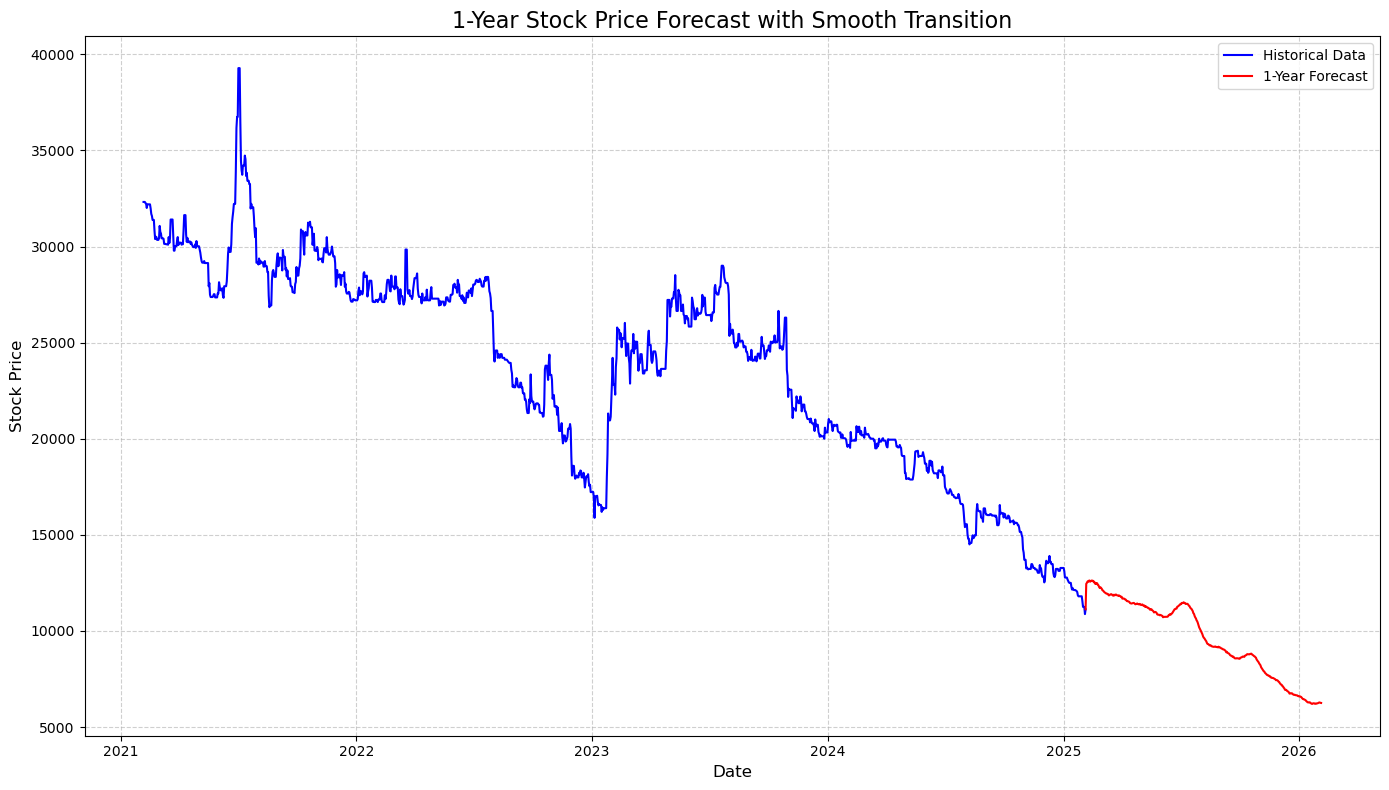

In [33]:
import matplotlib.pyplot as plt

# Find the last point of historical data
last_historical_date = df['ds'].max()
last_historical_value = df.loc[df['ds'] == last_historical_date, 'y'].values[0]

# Add the last historical point to the forecast for smooth transition
one_year_forecast = forecast[forecast['ds'] > last_historical_date]
smooth_forecast = pd.concat([
    pd.DataFrame({'ds': [last_historical_date], 'yhat': [last_historical_value]}),
    one_year_forecast[['ds', 'yhat']]
])

# Visualization: Historical and Forecasted Data
plt.figure(figsize=(14, 8))

# Plot historical data
plt.plot(df['ds'], df['y'], label='Historical Data', color='blue')

# Plot 1-year forecast with a smooth transition
plt.plot(smooth_forecast['ds'], smooth_forecast['yhat'], label='1-Year Forecast', color='red')

# # Add confidence intervals for the forecast
# plt.fill_between(
#     one_year_forecast['ds'], 
#     one_year_forecast['yhat_lower'], 
#     one_year_forecast['yhat_upper'], 
#     color='pink', alpha=0.3, label='Uncertainty Interval'
# )

# Add title, labels, and legend
plt.title('1-Year Stock Price Forecast with Smooth Transition', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


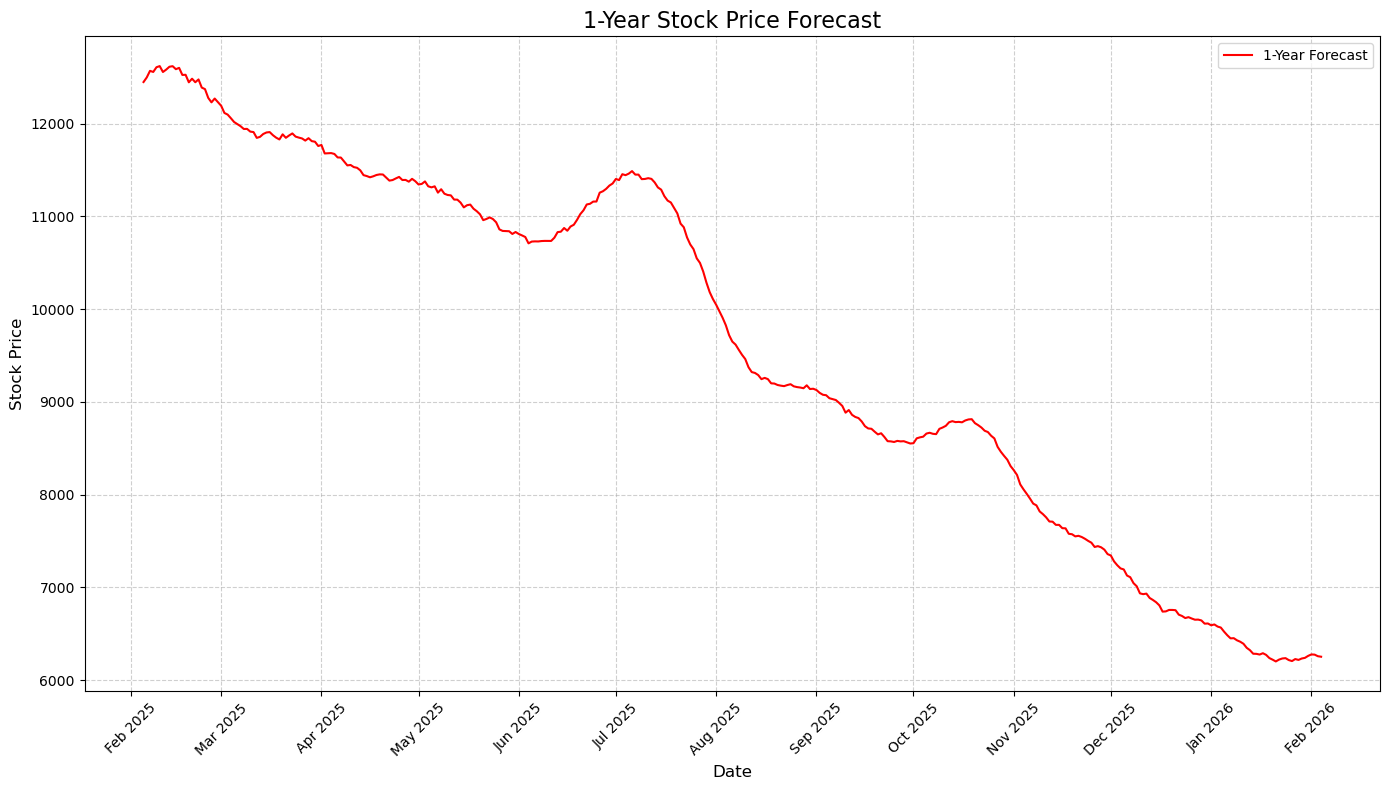

In [34]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Visualization of 1-Year Ahead Prediction with Monthly X-Ticks
plt.figure(figsize=(14, 8))

# Plot 1-year forecast
plt.plot(one_year_forecast['ds'], one_year_forecast['yhat'], label='1-Year Forecast', color='red')

# Add title and labels
plt.title('1-Year Stock Price Forecast', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)

# Add x-ticks for every month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks: every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as "Month Year"
plt.xticks(rotation=45, fontsize=10)

# Add legend and grid
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()

In [35]:
forecast[['ds', 'yhat']].tail(10)

,ds,yhat
1816,2026-01-26,6204.675373
1817,2026-01-27,6226.418532
1818,2026-01-28,6216.996258
1819,2026-01-29,6232.167606
1820,2026-01-30,6239.288655
1821,2026-01-31,6260.820668
1822,2026-02-01,6276.314657
1823,2026-02-02,6274.031550
1824,2026-02-03,6256.956033
1825,2026-02-04,6251.587907


`Insight`

Added MAPE calculation for comprehensive error evaluation

Enhanced parameter grid with:

Changepoint range adjustment

Custom yearly seasonality with Fourier order tuning

More granular parameter options

Implemented proper future forecasting with:

Full dataset training for final model

365-day forecast period

Synthetic regressor generation (replace with real data in practice)

## **Model Comparison: Prophet vs. LSTM**

**Prophet**  
- Developed by Facebook/Meta to forecast user growth by demographics.  
- Handles seasonality effectively.  
- Limitations: Requires sufficient historical data for accuracy.

**LSTM (Long Short-Term Memory)**  
- Effective for sequential data and time-series forecasting.  
- Handles long-term dependencies.  
- Limitations: High computational cost and slow training times.

---

## **Forecasting Accuracy**

**LSTM Model Performance:**  
- **MAPE:** 19.5%  
- **MAE:** 3,106.18  

**Prophet Model Performance:**  
- **MAPE:** 5.5%  
- **MAE:** 833.37  

---

## **Insights and Interpretation**

1. **Downtrend:** GGRM stock prices have been consistently declining, and the model expects this trend to continue for the next year.  
2. **Seasonality:** Prices tend to be higher in the early months and lower towards the end of the year.

---

## **Conclusion**

1. **Long-Term Downtrend:** Both historical trends and the forecast model indicate a continued decline in GGRM stock prices.  
2. **Seasonality:** Prices are expected to be higher in Q1 and lower by year-end, suggesting potential for short-term trading strategies.  
3. **Bearish Outlook:** Unless there is a fundamental change, the stock is likely to continue its decline through 2025-2026.

---

## **Recommendations**

1. **Short GGRM for Long-Term Gains:**  
   - **Entry Point:** After the seasonal peak in Q1.  
   - **Exit Point:** Hold through the year-end dip, and potentially extend into 2025-2026 if the downtrend persists.

2. **Monitor Fundamental Changes:**  
   - Be vigilant for catalysts that may reverse the downtrend.  
   - Consider hedging volatility with put options if holding other investments in the same sector.

---

## **Thank You**  
Clove Investment Indonesia